<a href="https://colab.research.google.com/github/heghiw/Data-Warehouses-and-Reporting/blob/main/masterupdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Authenticate and install dependencies
from google.colab import auth
auth.authenticate_user()
import pandas as pd
!pip install -q google-cloud-storage

# Step 2: Upload your service account key
from google.colab import files
uploaded = files.upload()

# Step 3: Define configs
import os
from google.cloud import storage

KEYFILE = list(uploaded.keys())[0]  # your JSON key file
PROJECT_ID = "starry-argon-456916-i5"
BUCKET_NAME = "sroubecky"
FOLDER_PATH = "tables"

# set environment variable for authentication
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = f"/content/{KEYFILE}"

# Step 4: Initialize storage client
client = storage.Client(project=PROJECT_ID)
bucket = client.bucket(BUCKET_NAME)

# Step 5: Download all CSVs from the GCS folder to Colab
blobs = bucket.list_blobs(prefix=FOLDER_PATH)

local_folder = "/content/tables"
os.makedirs(local_folder, exist_ok=True)

csv_files = []
for blob in blobs:
    if blob.name.endswith(".csv"):
        dest_path = os.path.join(local_folder, os.path.basename(blob.name))
        blob.download_to_filename(dest_path)
        csv_files.append(dest_path)
        print(f"Downloaded {blob.name}")

# Step 6: Load all CSVs into separate pandas DataFrames

# map filenames to variable-friendly names
filename_map = {
    "carinfo_kombinace_faults-000000000000": "df_carinfo_kombinace_faults",
    "instance-000000000000": "df_instance",
    "karoserie_faults-000000000000": "df_karoserie_faults",
    "model-000000000000": "df_model",
    "modell-000000000000": "df_modell",
    "motor_faults-000000000000": "df_motor_faults",
    "prevodovka_faults-000000000000": "df_prevodovka_faults",
    "vybava_faults-000000000000": "df_vybava_faults"
}

# load each file
for path in csv_files:
    base_name = os.path.basename(path).replace(".csv", "")
    var_name = filename_map.get(base_name)
    if var_name:
        globals()[var_name] = pd.read_csv(path)
        print(f"{var_name} loaded with shape {globals()[var_name].shape}")
    else:
        print(f"Skipping unknown file: {base_name}")



Saving starry-argon-456916-i5-721c59a92819.json to starry-argon-456916-i5-721c59a92819 (2).json
Downloaded tables/carinfo_kombinace_faults-000000000000.csv
Downloaded tables/instance-000000000000.csv
Downloaded tables/karoserie_faults-000000000000.csv
Downloaded tables/model-000000000000.csv
Downloaded tables/modell-000000000000.csv
Downloaded tables/motor_faults-000000000000.csv
Downloaded tables/prevodovka_faults-000000000000.csv
Downloaded tables/vybava_faults-000000000000.csv
df_carinfo_kombinace_faults loaded with shape (5443, 7)
df_instance loaded with shape (143, 9)
df_karoserie_faults loaded with shape (107, 7)
df_model loaded with shape (137, 7)
df_modell loaded with shape (5443, 7)
df_motor_faults loaded with shape (333, 7)
df_prevodovka_faults loaded with shape (143, 7)
df_vybava_faults loaded with shape (200, 7)


In [11]:
df_carinfo_kombinace_faults.columns = [
    "carinfo_kombinace", "status_faults", "torque_faults", "angle_faults",
    "total_faults", "celkem", "t"
]

df_instance.columns = [
    "t", "status_typ", "status_hodnota", "M13", "M1", "KV", "KV5", "M14", "celkem"
]

df_karoserie_faults.columns = [
    "Karoserie", "status_faults", "torque_faults", "angle_faults",
    "total_faults", "celkem", "t"
]

df_model.columns = [
    "Model", "status_faults", "torque_faults", "angle_faults",
    "total_faults", "celkem", "t"
]

df_modell.columns = [
    "Modell", "status_faults", "torque_faults", "angle_faults",
    "total_faults", "celkem", "t"
]

df_motor_faults.columns = [
    "Motor", "status_faults", "torque_faults", "angle_faults",
    "total_faults", "celkem", "t"
]

df_prevodovka_faults.columns = [
    "Prevodovka", "status_faults", "torque_faults", "angle_faults",
    "total_faults", "celkem", "t"
]

df_vybava_faults.columns = [
    "Vybava", "status_faults", "torque_faults", "angle_faults",
    "total_faults", "celkem", "t"
]


In [13]:
print("df_carinfo_kombinace_faults")
print(df_carinfo_kombinace_faults.head(), "\n")

print("df_instance")
print(df_instance.head(), "\n")

print("df_karoserie_faults")
print(df_karoserie_faults.head(), "\n")

print("df_model")
print(df_model.head(), "\n")

print("df_modell")
print(df_modell.head(), "\n")

print("df_motor_faults")
print(df_motor_faults.head(), "\n")

print("df_prevodovka_faults")
print(df_prevodovka_faults.head(), "\n")

print("df_vybava_faults")
print(df_vybava_faults.head(), "\n")


df_carinfo_kombinace_faults
   carinfo_kombinace  status_faults  torque_faults  angle_faults  \
0  3V3245-3V-3-2-4-5             18             16            16   
1  3V3245-3V-3-2-4-5            123            183           179   
2  3V3245-3V-3-2-4-5             66             54            42   
3  3V3245-3V-3-2-4-5             48             76            80   
4  3V3245-3V-3-2-4-5             20              8            10   

   total_faults  celkem        t  
0            50    1222  2023-02  
1           485    5889  2023-03  
2           162    4174  2023-04  
3           204    3576  2023-05  
4            38     638  2023-06   

df_instance
         t    status_typ   status_hodnota      M13        M1       KV  \
0  2023-01  angle_status  Result was High    12093     28276    11323   
1  2023-01  angle_status   Result was Low   126028     91644    56789   
2  2023-01  angle_status    Result was OK  8714162  11179198  8664259   
3  2023-01        status           Not OK   207

In [36]:
df_vybava_faults['Vybava'].unique()


array(['1', '2', '3', '4', '5', '6', '7', '8', 'B', 'C', 'D', 'F', 'J',
       'M', 'P', 'Q', 'R', 'S', 'Unknown'], dtype=object)

grafy v case

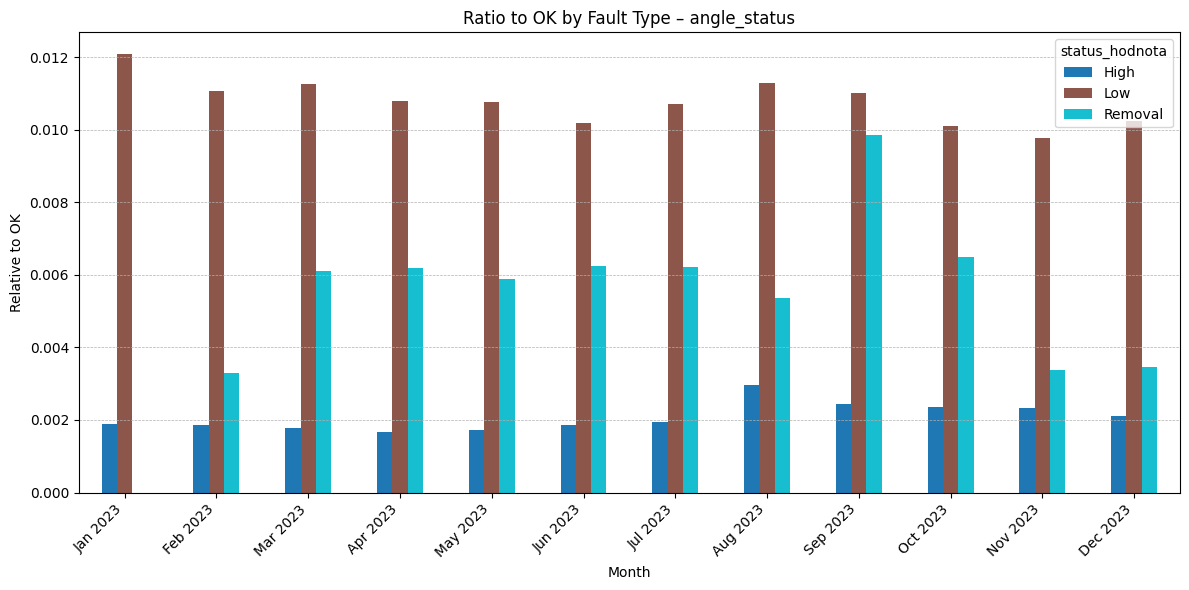

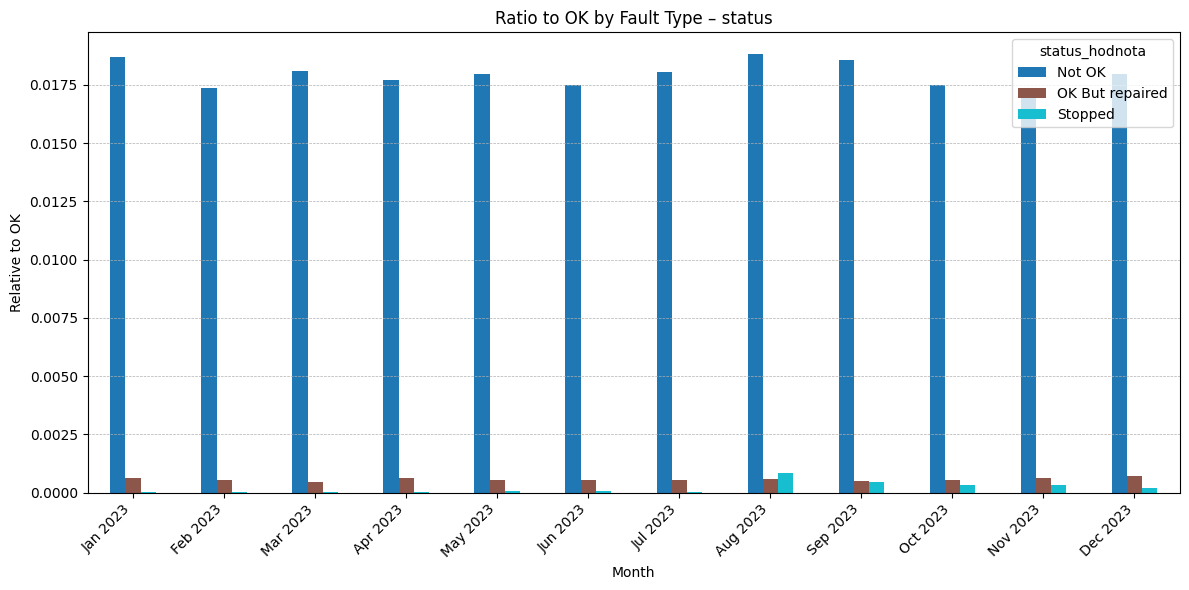

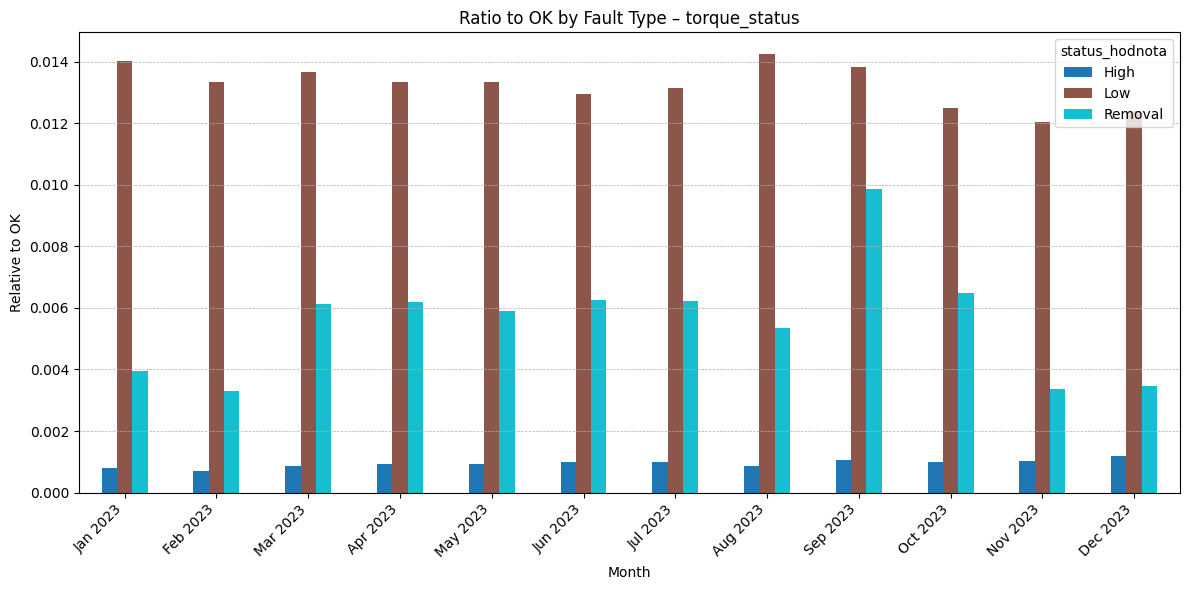

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# ensure datetime
df_instance['t'] = pd.to_datetime(df_instance['t'])

# normalize names in status_hodnota
df_instance['status_hodnota'] = df_instance['status_hodnota'].replace({
    'Result was OK': 'OK',
    'Result was High': 'High',
    'Result was Low': 'Low',
    'Not OK': 'Not OK',
    'Removal': 'Removal',
    'OK': 'OK'
})

# select numeric columns to melt
value_columns = df_instance.select_dtypes(include='number').columns.difference(['celkem'])

# loop through each status_typ (angle_status, torque_status, status)
for status in df_instance['status_typ'].unique():
    filtered = df_instance[df_instance['status_typ'] == status]

    # melt all station columns into long format
    df_long = filtered.melt(
        id_vars=['t', 'status_hodnota'],
        value_vars=value_columns,
        var_name='station',
        value_name='count'
    )

    # total count per month per status_hodnota
    grouped = df_long.groupby(['t', 'status_hodnota'])['count'].sum().reset_index()
    pivot = grouped.pivot(index='t', columns='status_hodnota', values='count').fillna(0)

    # compute ratios to OK
    if 'OK' in pivot.columns:
        ratio_df = pivot.drop(columns='OK').div(pivot['OK'], axis=0)
    else:
        continue  # skip if no OK values

    ratio_df.index = ratio_df.index.strftime('%b %Y')

    # plot
    ratio_df.plot(kind='bar', figsize=(12, 6), colormap='tab10')
    plt.title(f"Ratio to OK by Fault Type – {status}")
    plt.xlabel("Month")
    plt.ylabel("Relative to OK")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.legend(title='status_hodnota')
    plt.tight_layout()
    plt.show()


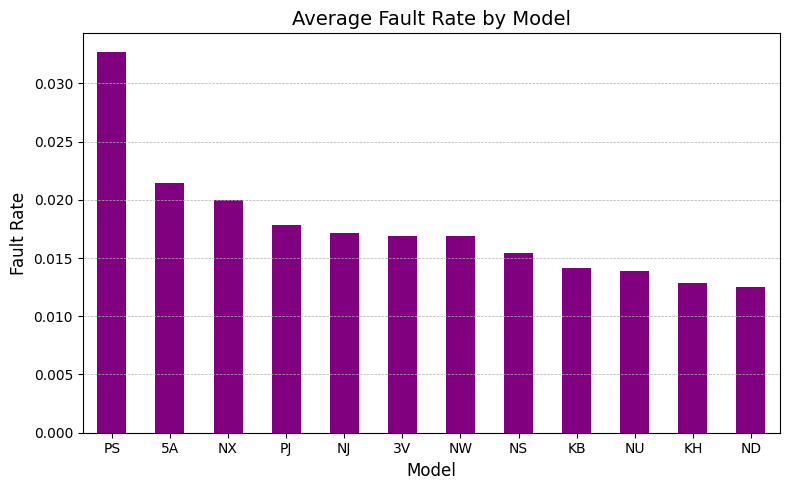

In [64]:
import matplotlib.pyplot as plt

# filter out 'Unknown' models
df_filtered = df_model[df_model['Model'] != 'Unknown'].copy()

# calculate fault rate
df_filtered['fault_rate'] = df_filtered['status_faults'] / df_filtered['celkem']

# average fault rate per model
model_rates = df_filtered.groupby('Model')['fault_rate'].mean().sort_values(ascending=False)

# plot with minimalist style
plt.figure(figsize=(8, 5))
model_rates.plot(kind='bar', color='purple')

plt.title("Average Fault Rate by Model", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Fault Rate", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


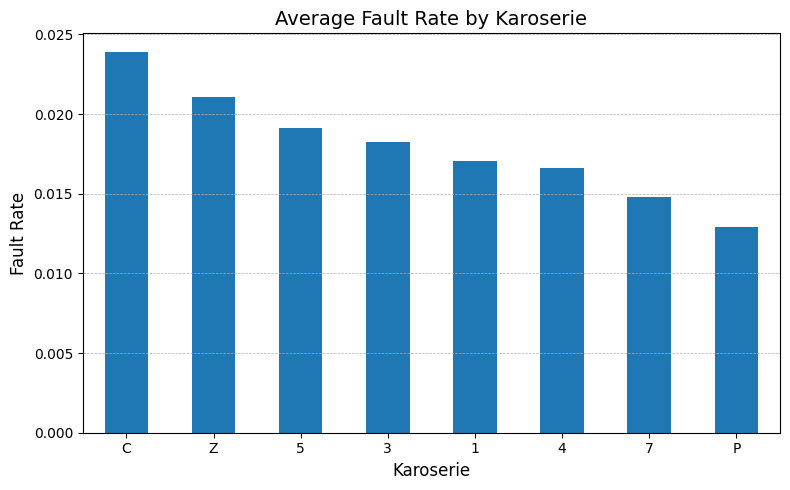

In [66]:
import matplotlib.pyplot as plt

# filter out Unknown if present
df_filtered = df_karoserie_faults[df_karoserie_faults['Karoserie'] != 'Unknown'].copy()

# compute fault rate
df_filtered['fault_rate'] = df_filtered['status_faults'] / df_filtered['celkem']

# average fault rate per Karoserie
karoserie_rates = df_filtered.groupby('Karoserie')['fault_rate'].mean().sort_values(ascending=False)

# plot
plt.figure(figsize=(8, 5))
karoserie_rates.plot(kind='bar', color='#1f77b4')

plt.title("Average Fault Rate by Karoserie", fontsize=14)
plt.xlabel("Karoserie", fontsize=12)
plt.ylabel("Fault Rate", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


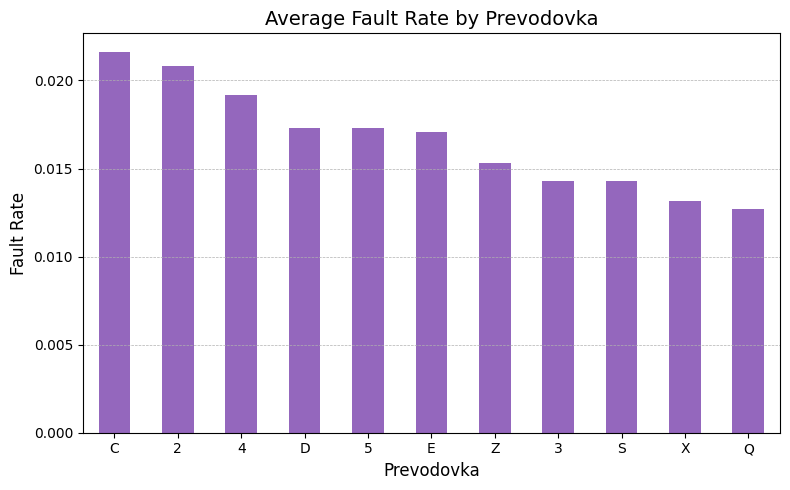

In [67]:
import matplotlib.pyplot as plt

# filter out 'Unknown' if it exists
df_filtered = df_prevodovka_faults[df_prevodovka_faults['Prevodovka'] != 'Unknown'].copy()

# compute fault rate
df_filtered['fault_rate'] = df_filtered['status_faults'] / df_filtered['celkem']

# average fault rate per Prevodovka
prevodovka_rates = df_filtered.groupby('Prevodovka')['fault_rate'].mean().sort_values(ascending=False)

# plot
plt.figure(figsize=(8, 5))
prevodovka_rates.plot(kind='bar', color='#9467bd')  # using a consistent but different color

plt.title("Average Fault Rate by Prevodovka", fontsize=14)
plt.xlabel("Prevodovka", fontsize=12)
plt.ylabel("Fault Rate", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


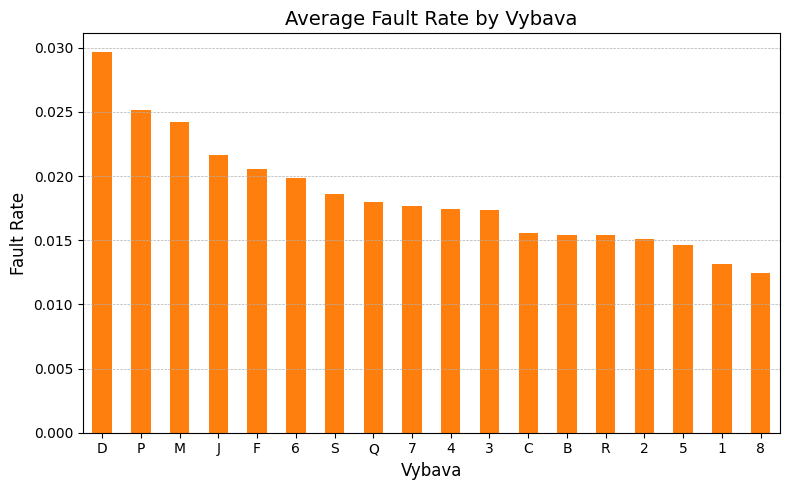

In [68]:
import matplotlib.pyplot as plt

# filter out 'Unknown' if it exists
df_filtered = df_vybava_faults[df_vybava_faults['Vybava'] != 'Unknown'].copy()

# compute fault rate
df_filtered['fault_rate'] = df_filtered['status_faults'] / df_filtered['celkem']

# average fault rate per Vybava
vybava_rates = df_filtered.groupby('Vybava')['fault_rate'].mean().sort_values(ascending=False)

# plot
plt.figure(figsize=(8, 5))
vybava_rates.plot(kind='bar', color='#ff7f0e')  # using a clean orange tone

plt.title("Average Fault Rate by Vybava", fontsize=14)
plt.xlabel("Vybava", fontsize=12)
plt.ylabel("Fault Rate", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


statisticke

In [53]:
import pandas as pd

# ensure datetime
df_carinfo_kombinace_faults['t'] = pd.to_datetime(df_carinfo_kombinace_faults['t'])

# remove 'Unknown' combinations
df_filtered = df_carinfo_kombinace_faults[
    ~df_carinfo_kombinace_faults['carinfo_kombinace'].str.contains('Unknown', na=False)
].copy()

# calculate fault rate in percent
df_filtered['fault_rate_percent'] = 100 * df_filtered['status_faults'] / df_filtered['celkem']
df_filtered['month'] = df_filtered['t'].dt.to_period('M').dt.to_timestamp()

# top 5 for each month
for month in sorted(df_filtered['month'].unique()):
    top5 = (
        df_filtered[df_filtered['month'] == month]
        .sort_values('fault_rate_percent', ascending=False)
        .head(5)[['carinfo_kombinace', 'fault_rate_percent']]
        .round(2)
    )
    print(f"\nTop 5 kombinace for {month.strftime('%B %Y')}")
    print(top5.to_string(index=False))

# overall top 5 kombinace across all months
overall = (
    df_filtered
    .groupby('carinfo_kombinace')[['status_faults', 'celkem']]
    .sum()
)
overall['fault_rate_percent'] = 100 * overall['status_faults'] / overall['celkem']
overall_top5 = overall.sort_values('fault_rate_percent', ascending=False).head(5).reset_index()
overall_top5['fault_rate_percent'] = overall_top5['fault_rate_percent'].round(2)

# print overall top 5
print("\nTop 5 kombinace overall (all months combined):")
print(overall_top5[['carinfo_kombinace', 'fault_rate_percent']].to_string(index=False))



Top 5 kombinace for January 2023
carinfo_kombinace  fault_rate_percent
NS75KC-NS-7-5-K-C                9.62
NW47ND-NW-4-7-N-D                5.88
NW12ND-NW-1-2-N-D                4.01
NX34VC-NX-3-4-V-C                3.97
NX56Q5-NX-5-6-Q-5                3.95

Top 5 kombinace for February 2023
carinfo_kombinace  fault_rate_percent
NX34VC-NX-3-4-V-C                5.56
PJ3BL5-PJ-3-B-L-5                4.36
NX33VC-NX-3-3-V-C                4.14
NX54VC-NX-5-4-V-C                4.07
NX52N5-NX-5-2-N-5                4.02

Top 5 kombinace for March 2023
carinfo_kombinace  fault_rate_percent
NU72ND-NU-7-2-N-D                5.09
NW4DMD-NW-4-D-M-D                4.58
5AZPF2-5A-Z-P-F-2                4.42
NX5RED-NX-5-R-E-D                4.41
NS75PZ-NS-7-5-P-Z                4.40

Top 5 kombinace for April 2023
carinfo_kombinace  fault_rate_percent
NX3R4D-NX-3-R-4-D                6.98
NX32TE-NX-3-2-T-E                6.98
NX3RVC-NX-3-R-V-C                5.12
3V33SC-3V-3-3-S-C              

In [48]:
!pip install scipy

In [52]:
from scipy.stats import binomtest

# remove 'Unknown' combinations
df = df_kom[~df_kom['carinfo_kombinace'].str.contains('Unknown', na=False)].copy()

# compute fault rate
df['fault_rate'] = df['status_faults'] / df['celkem']

# expected global fault rate
expected_fault_rate = df['status_faults'].sum() / df['celkem'].sum()

# binomial test
df['p_value'] = df.apply(
    lambda row: binomtest(row['status_faults'], row['celkem'], expected_fault_rate, alternative='greater').pvalue,
    axis=1
)

# filter and sort by significance
significant_df = df[df['p_value'] < 0.05].sort_values('p_value')

# display results
significant_df[['t', 'carinfo_kombinace', 'status_faults', 'celkem', 'fault_rate', 'p_value']]


,t,carinfo_kombinace,status_faults,celkem,fault_rate,p_value
4835,2023-04-01,NX54VC-NX-5-4-V-C,5598,181460,0.030850,0.000000
1256,2023-03-01,5AZJN4-5A-Z-J-N-4,29660,1252773,0.023675,0.000000
1233,2023-03-01,5AZJJ2-5A-Z-J-J-2,78810,3612815,0.021814,0.000000
1235,2023-05-01,5AZJJ2-5A-Z-J-J-2,46086,2029596,0.022707,0.000000
1234,2023-04-01,5AZJJ2-5A-Z-J-J-2,78560,3411078,0.023031,0.000000
...,...,...,...,...,...,...
4179,2023-03-01,NX34RD-NX-3-4-R-D,94,4561,0.020610,0.048956
4137,2023-09-01,NX34L5-NX-3-4-L-5,193,9902,0.019491,0.049161
4717,2023-11-01,NX547D-NX-5-4-7-D,17331,992219,0.017467,0.049308
1749,2023-01-01,KHP8OZ-KH-P-8-O-Z,114,5629,0.020252,0.049339


cramers

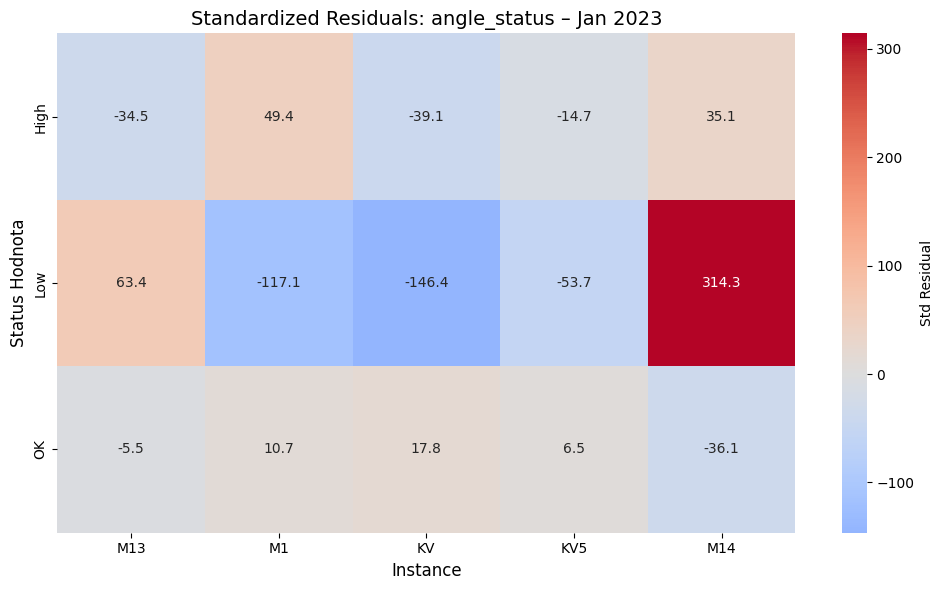

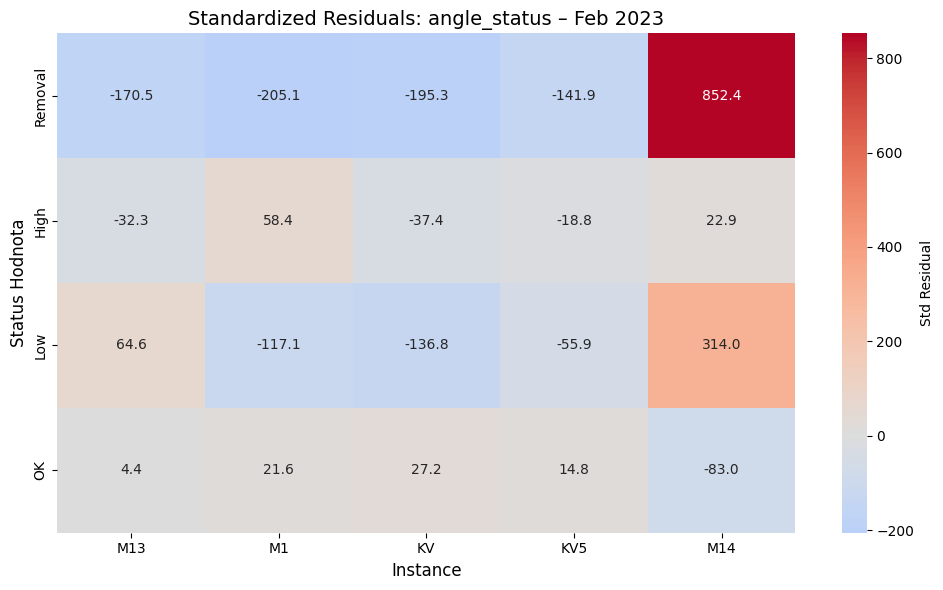

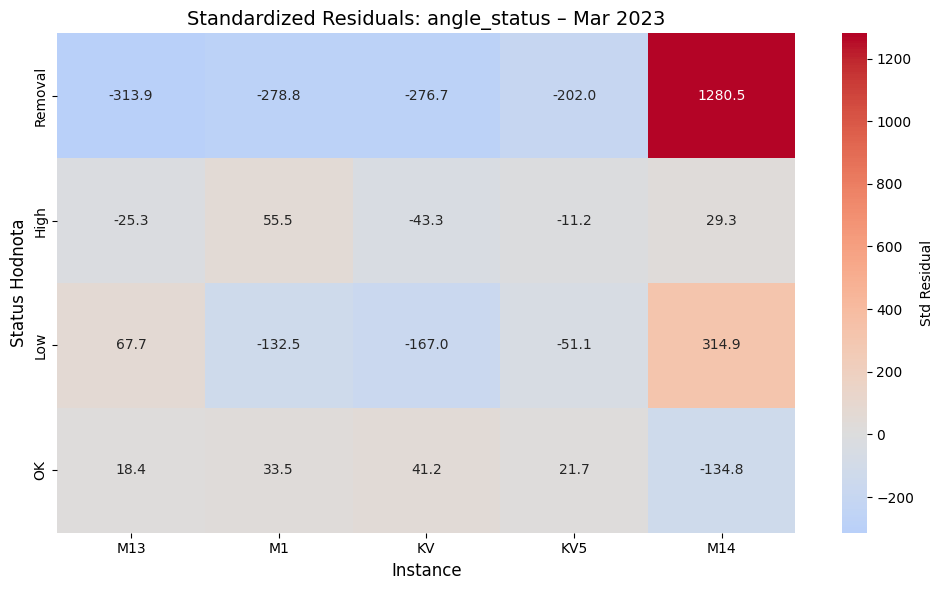

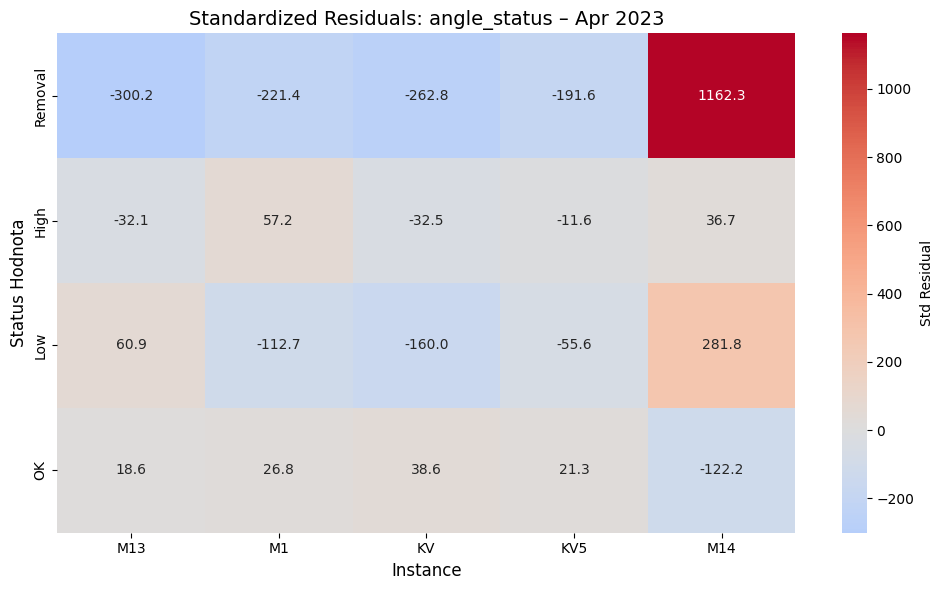

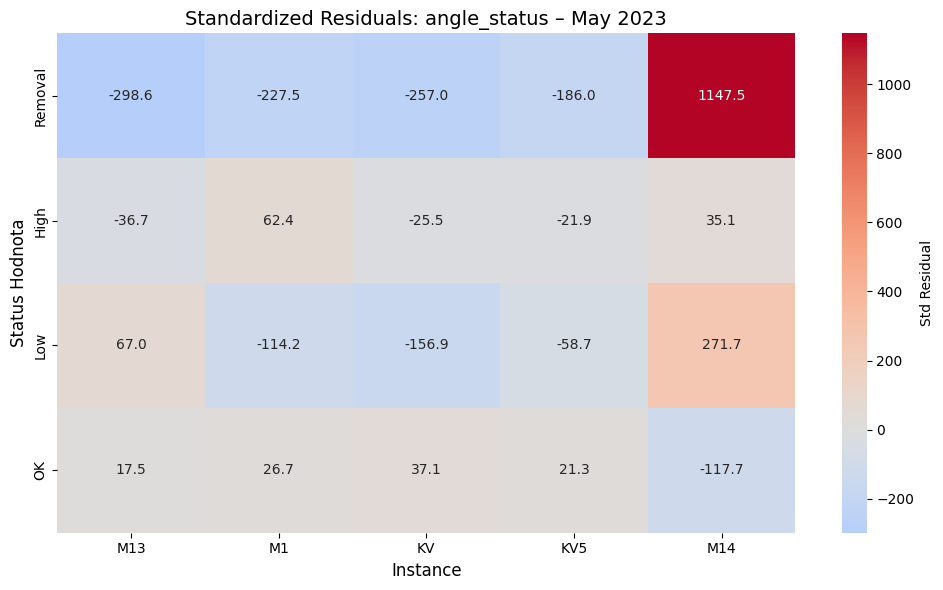

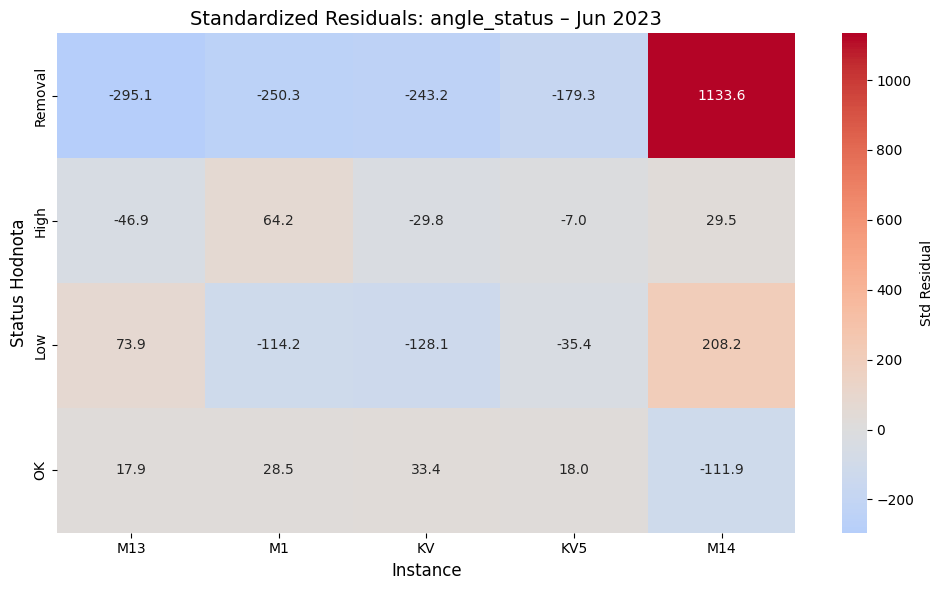

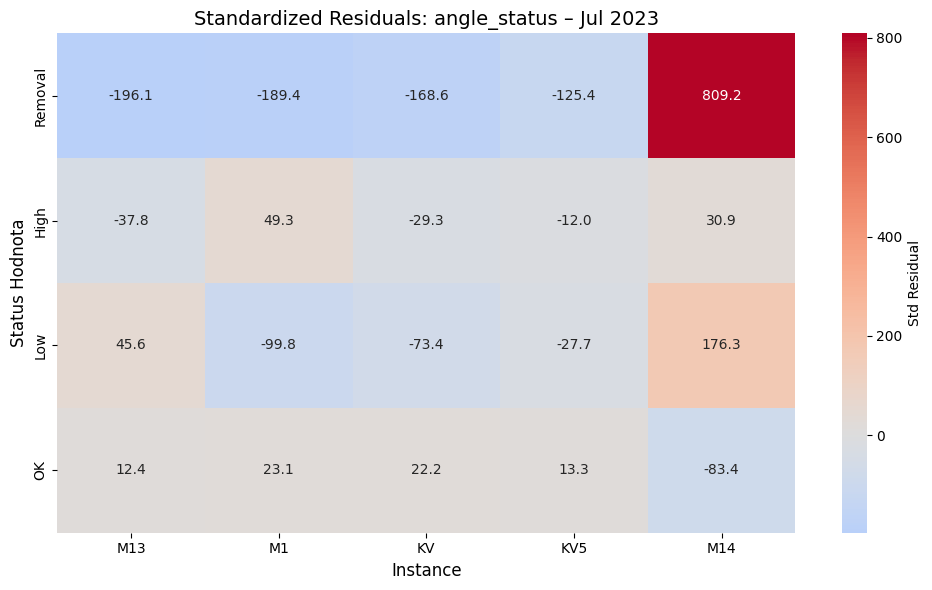

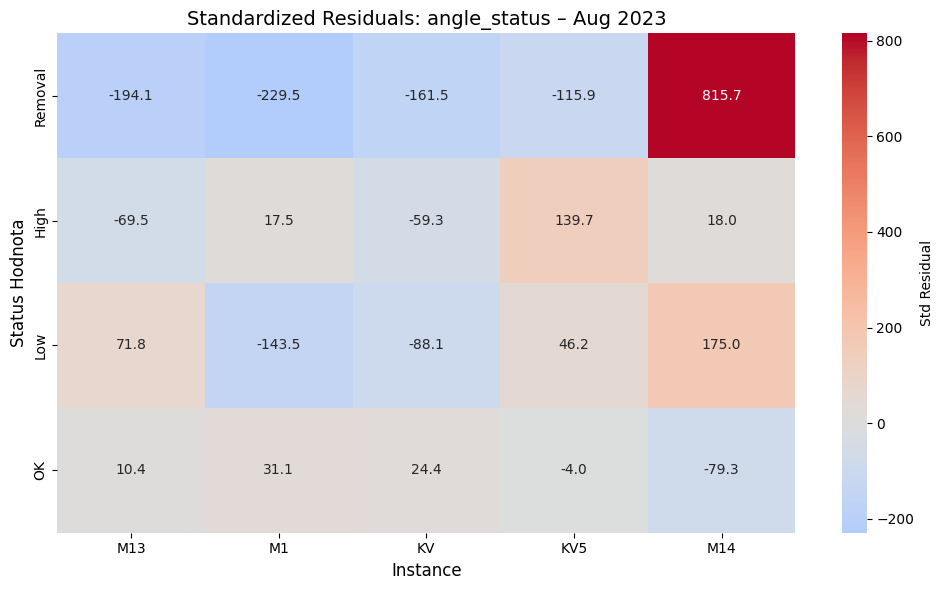

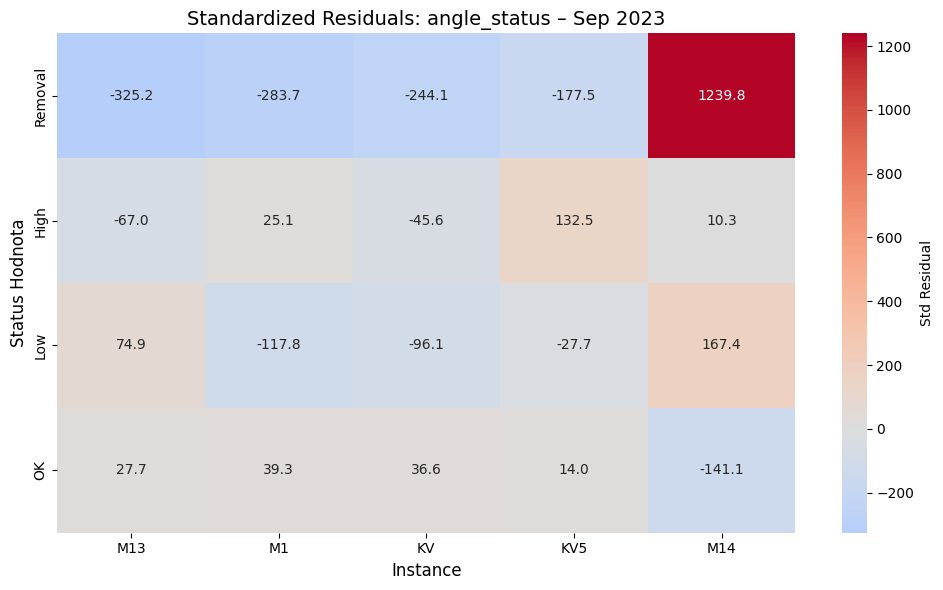

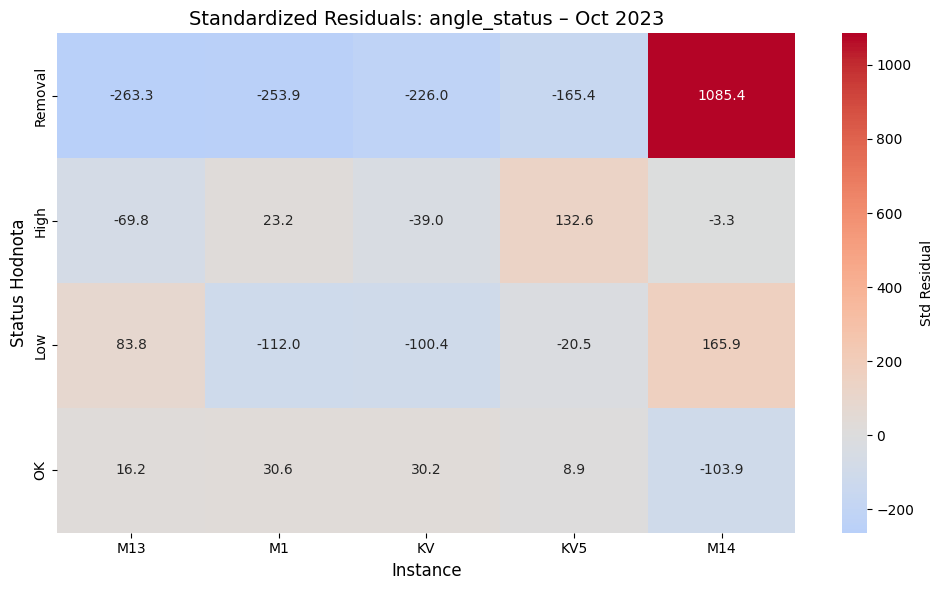

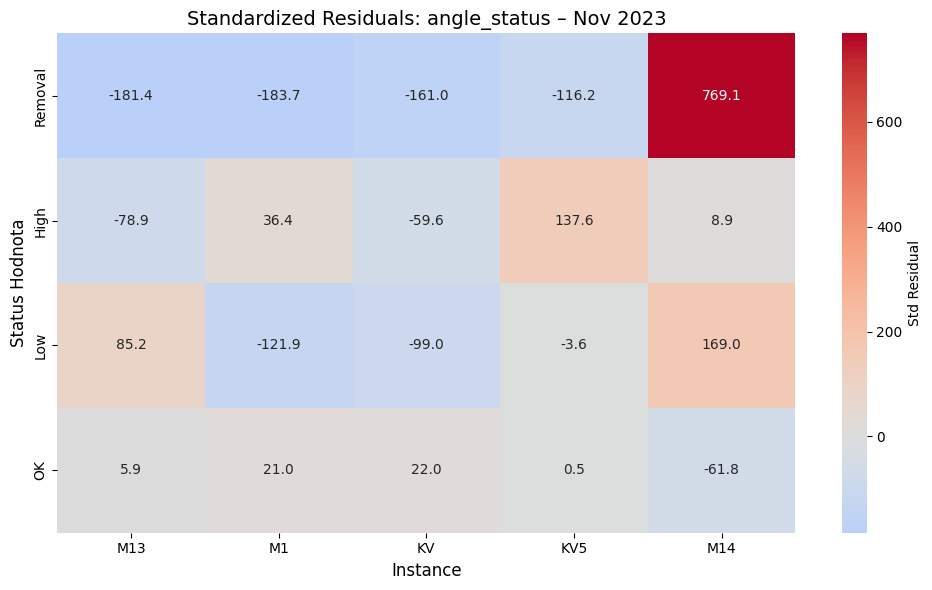

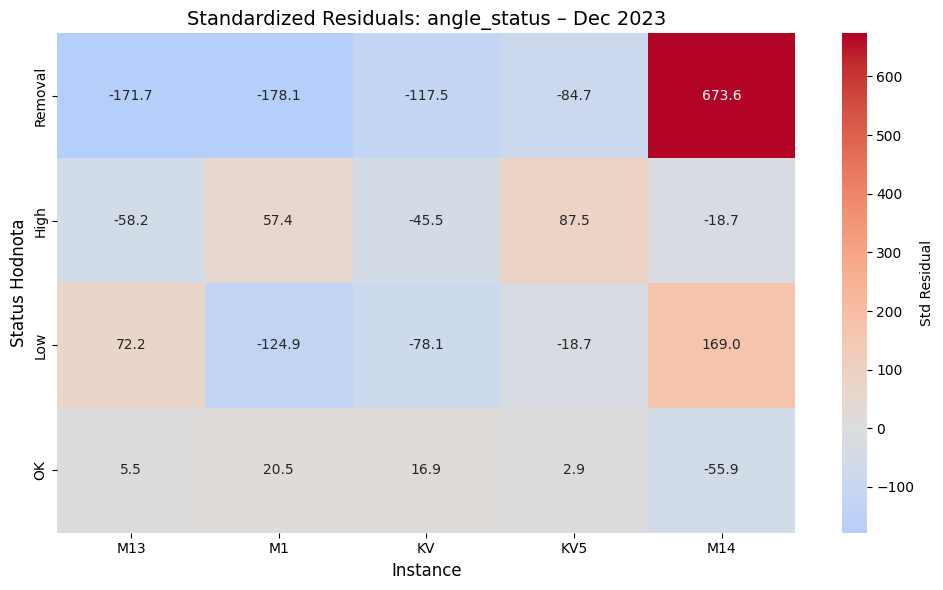

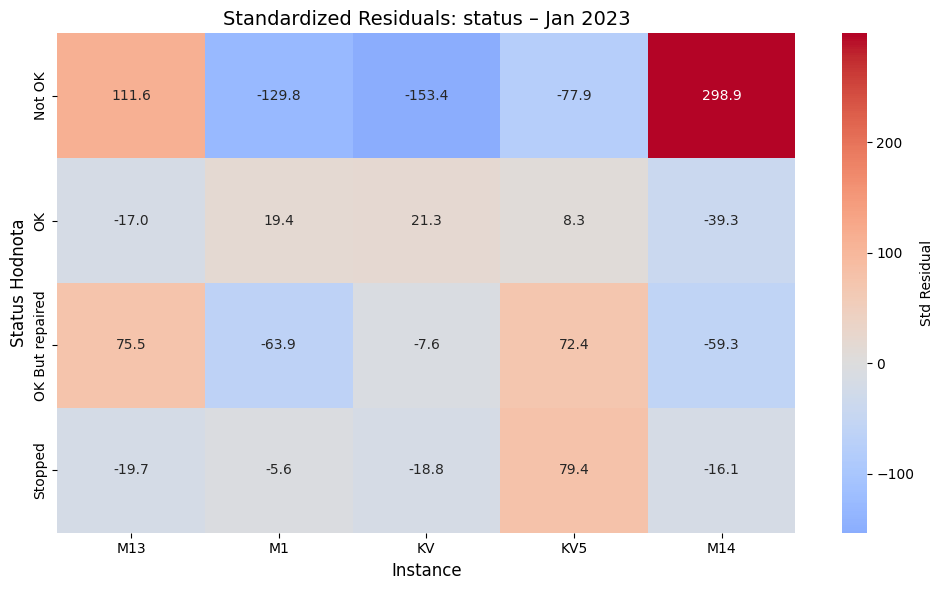

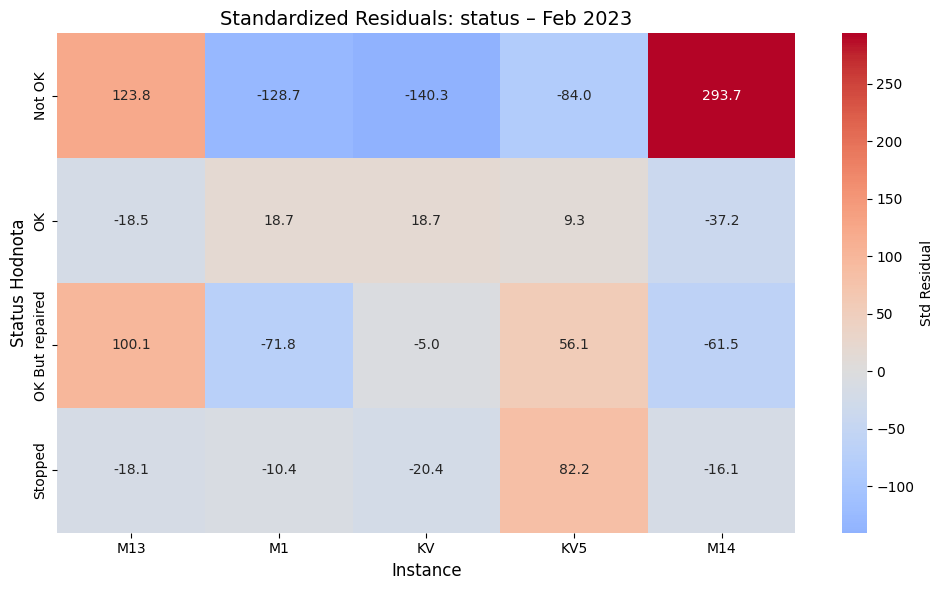

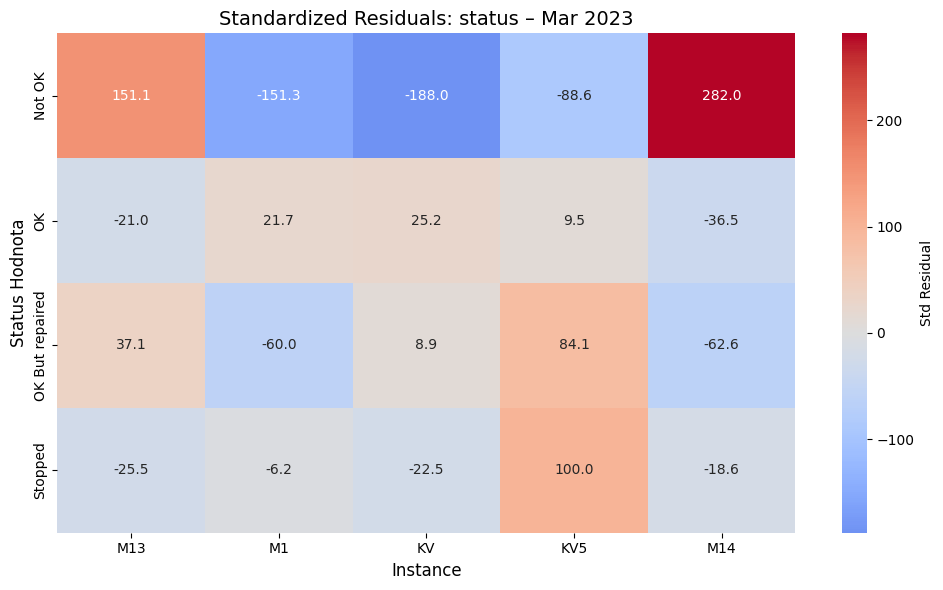

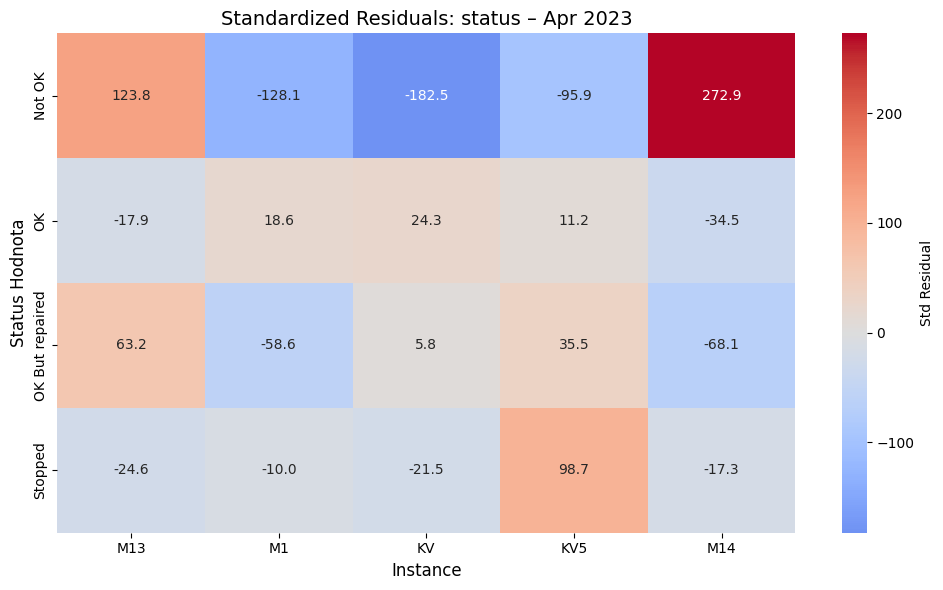

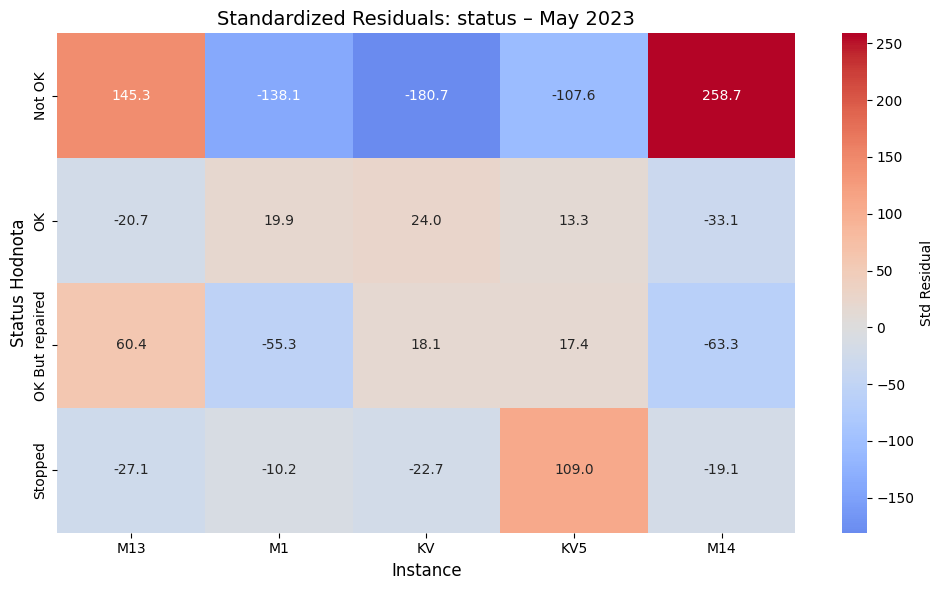

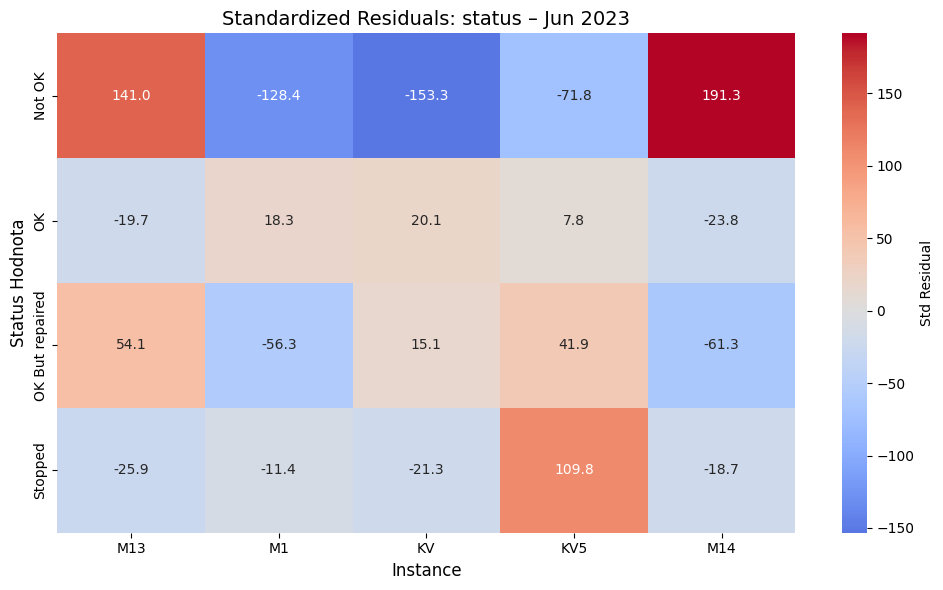

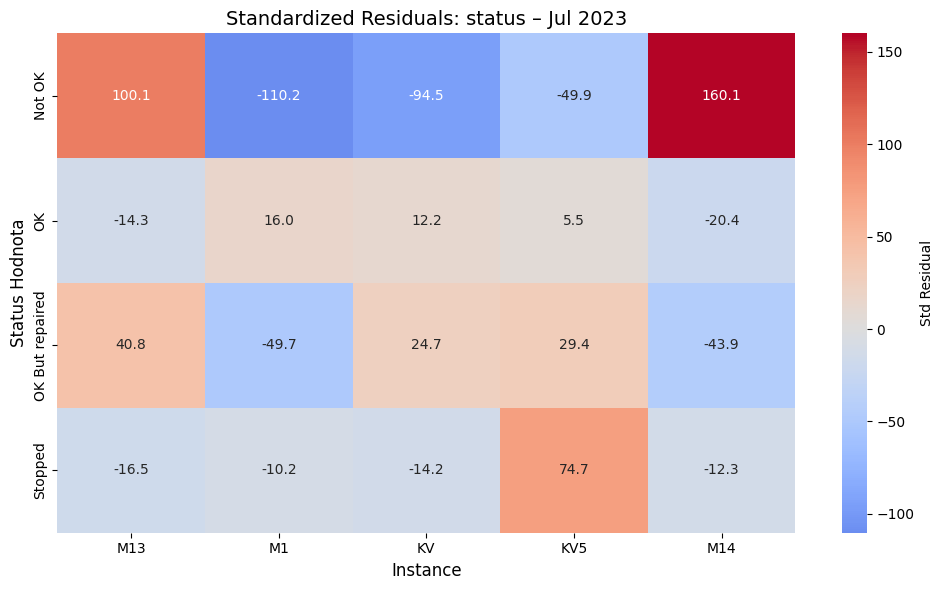

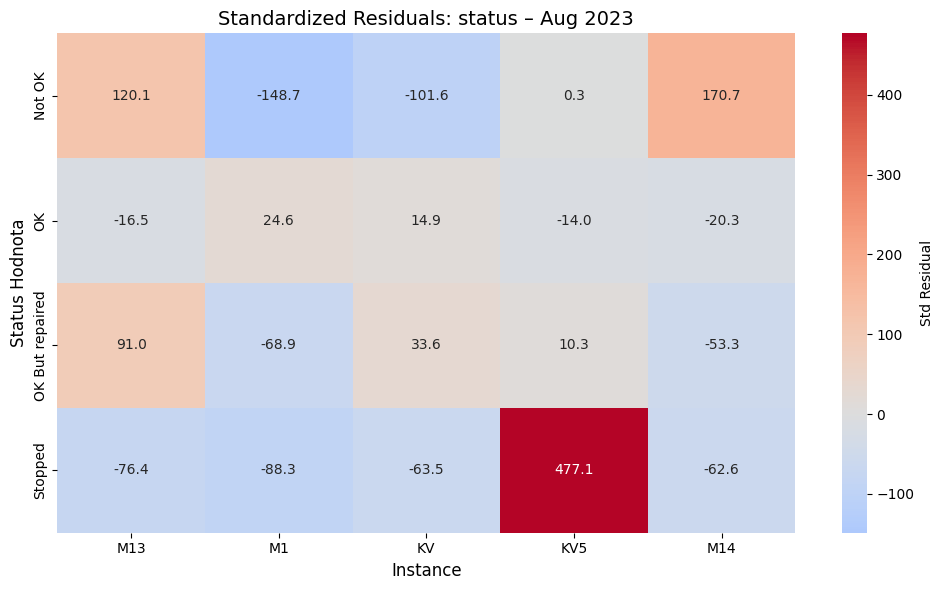

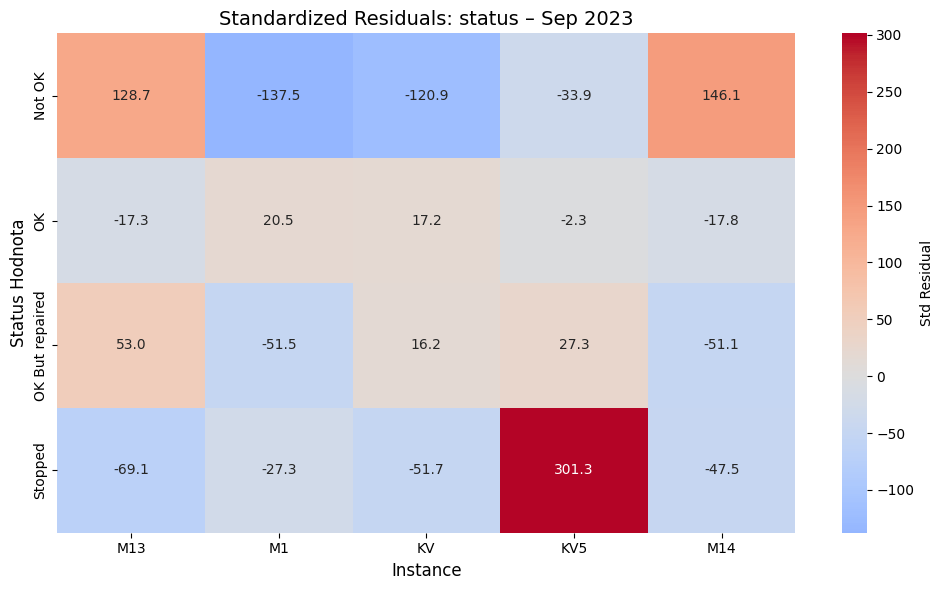

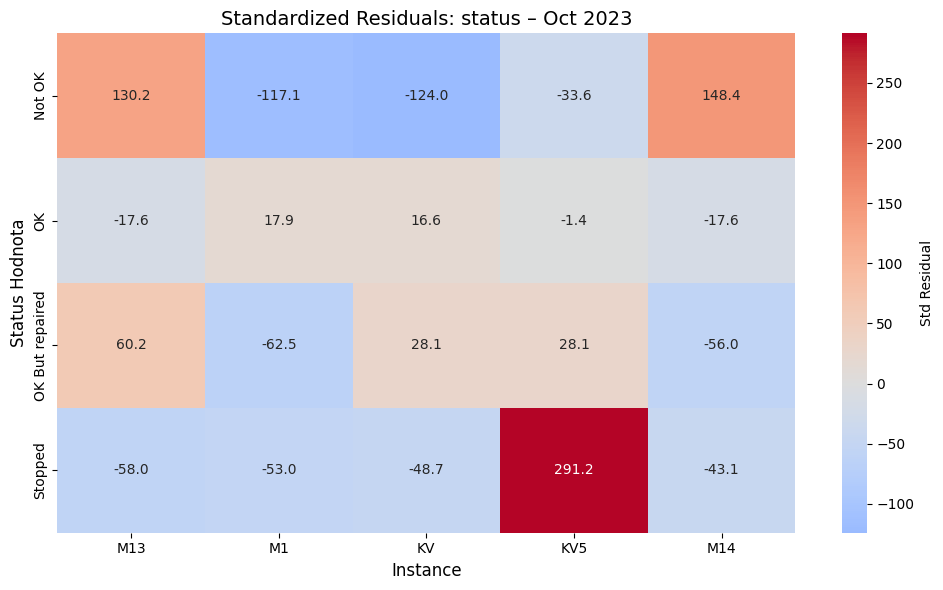

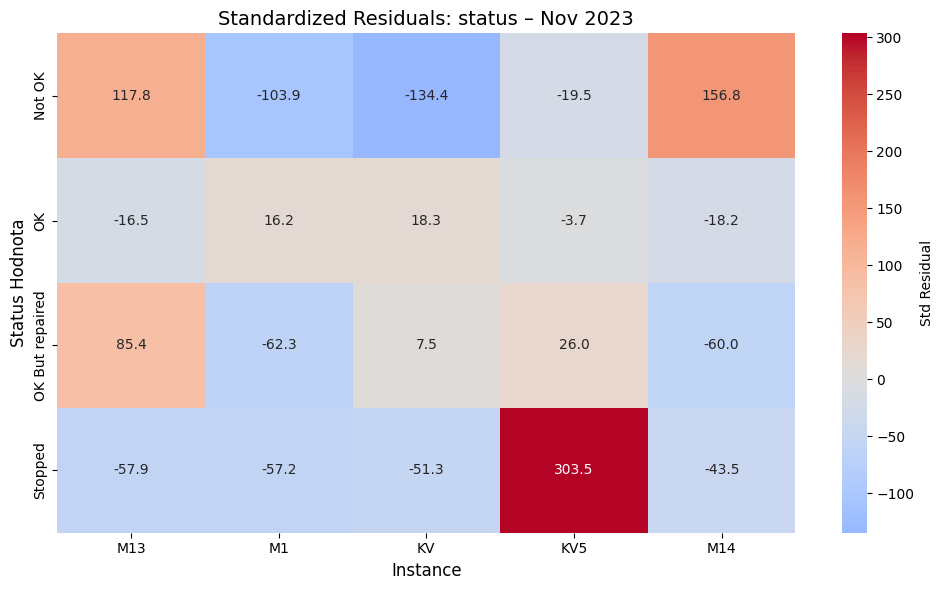

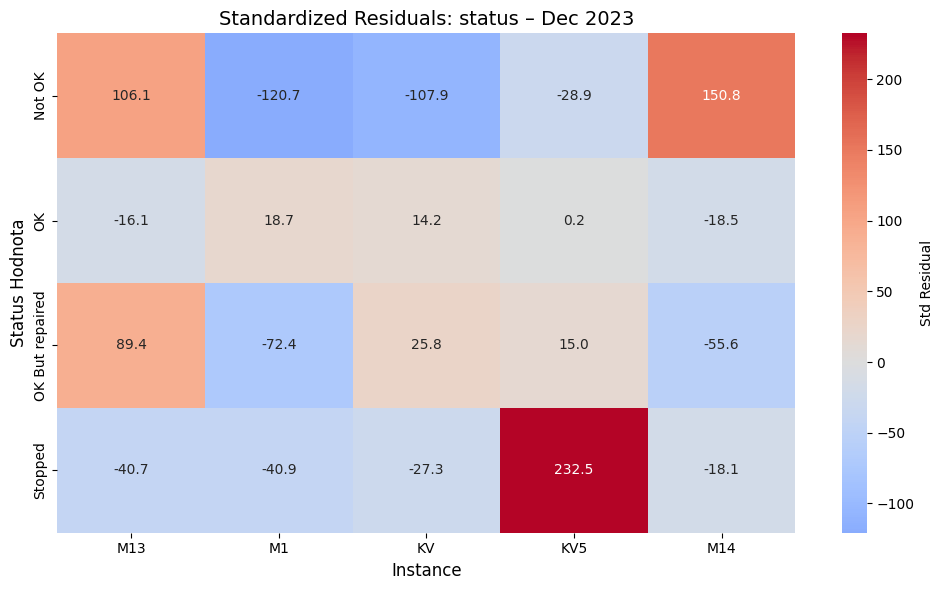

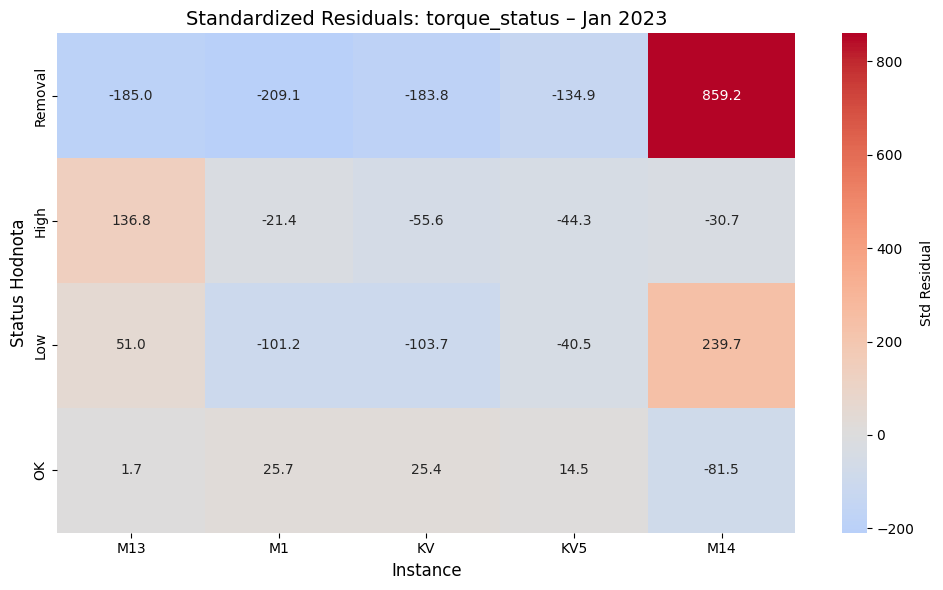

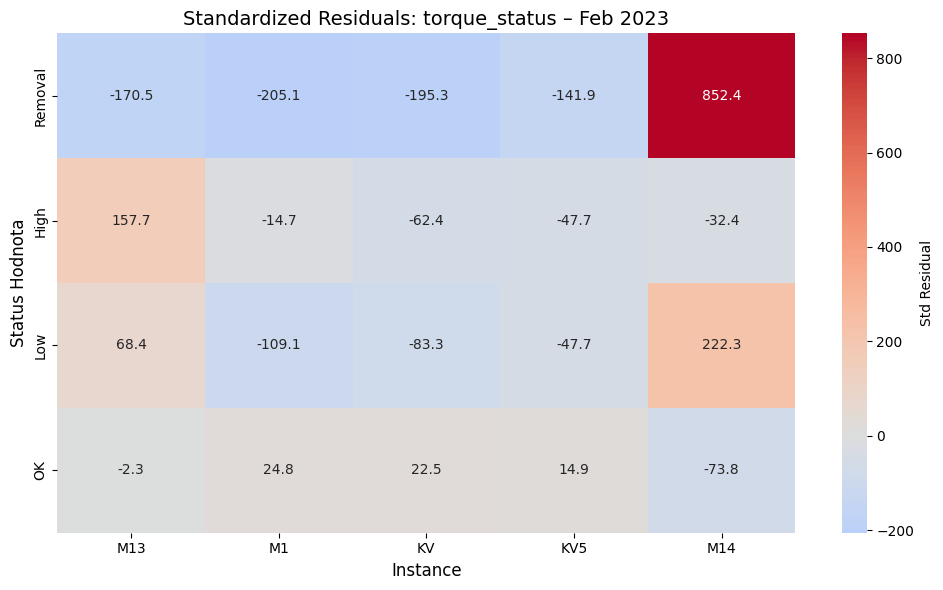

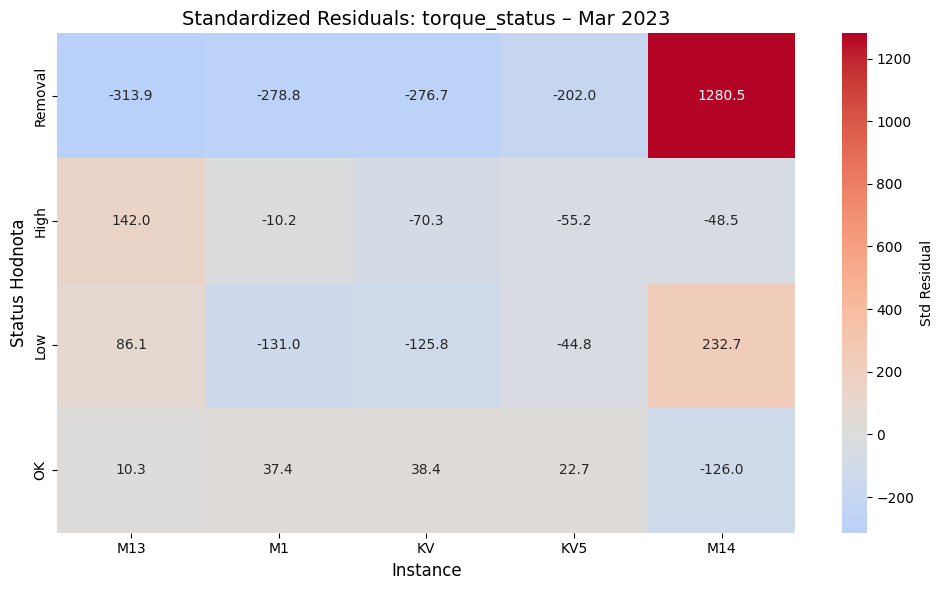

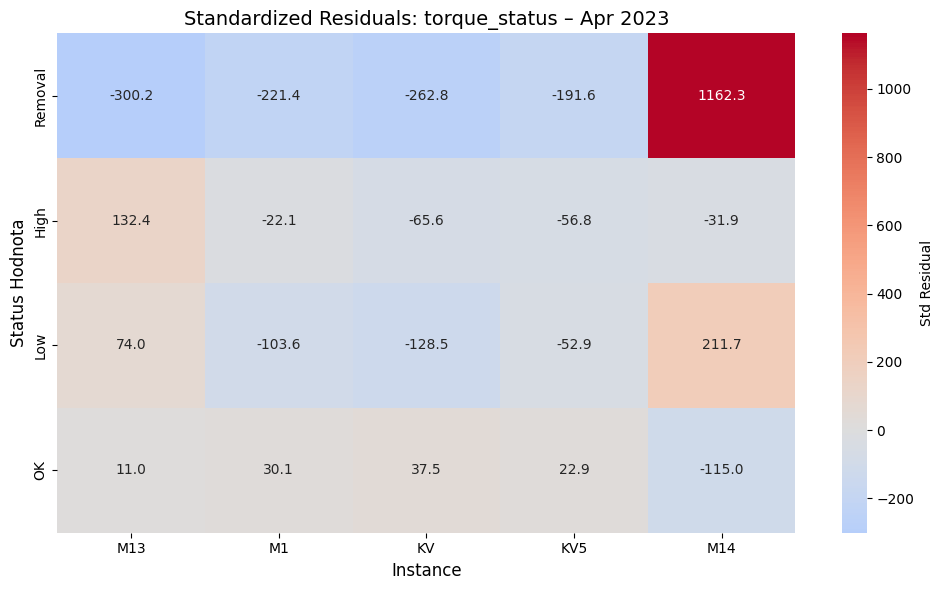

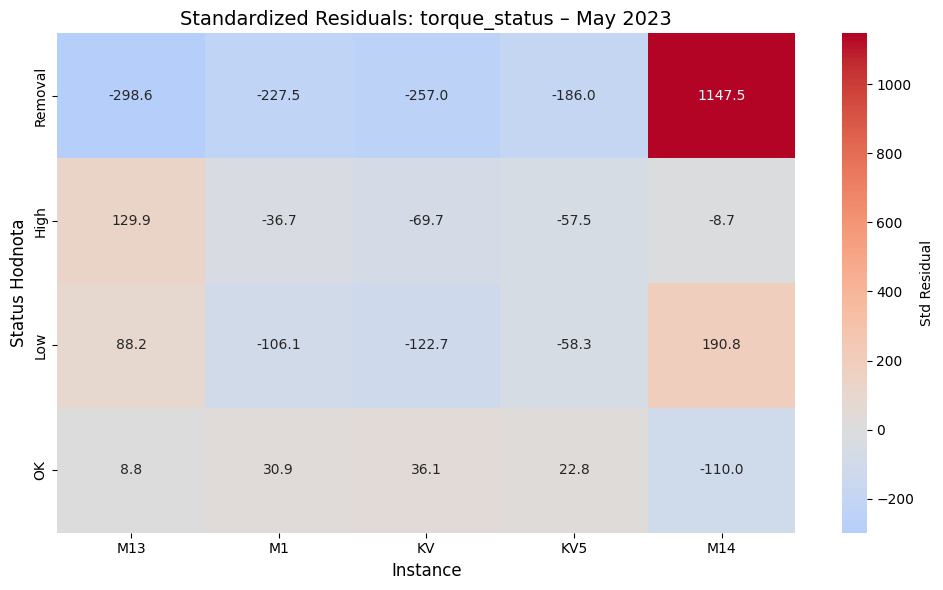

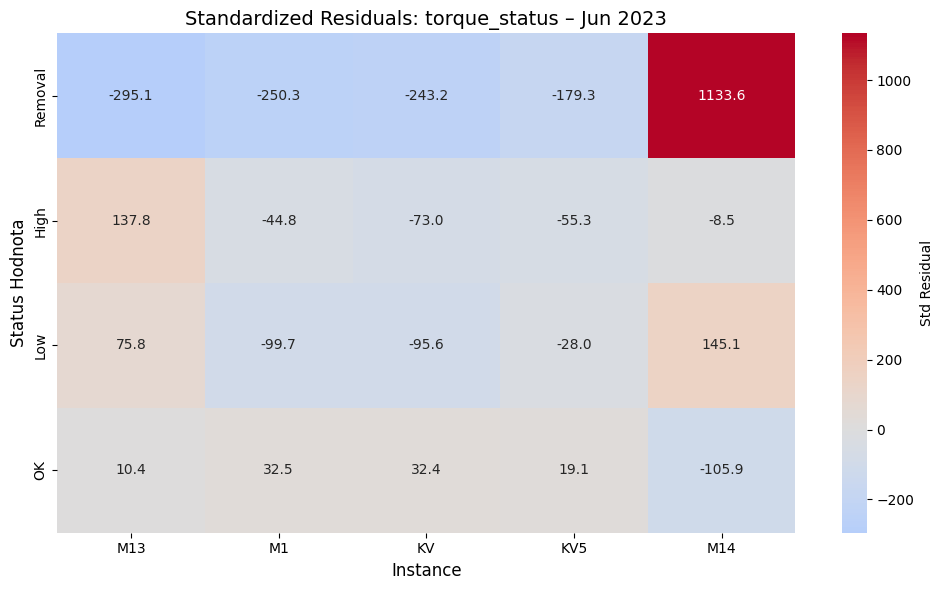

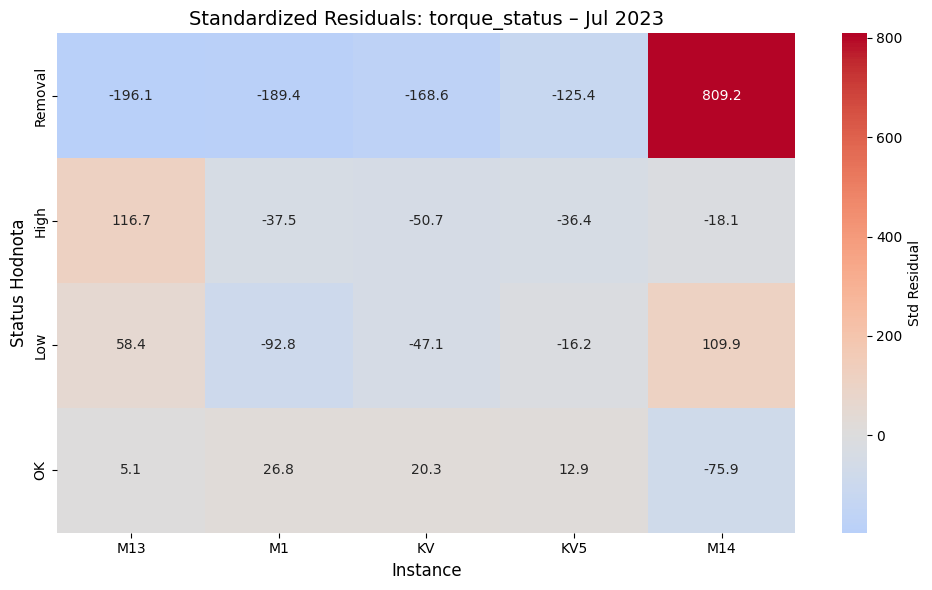

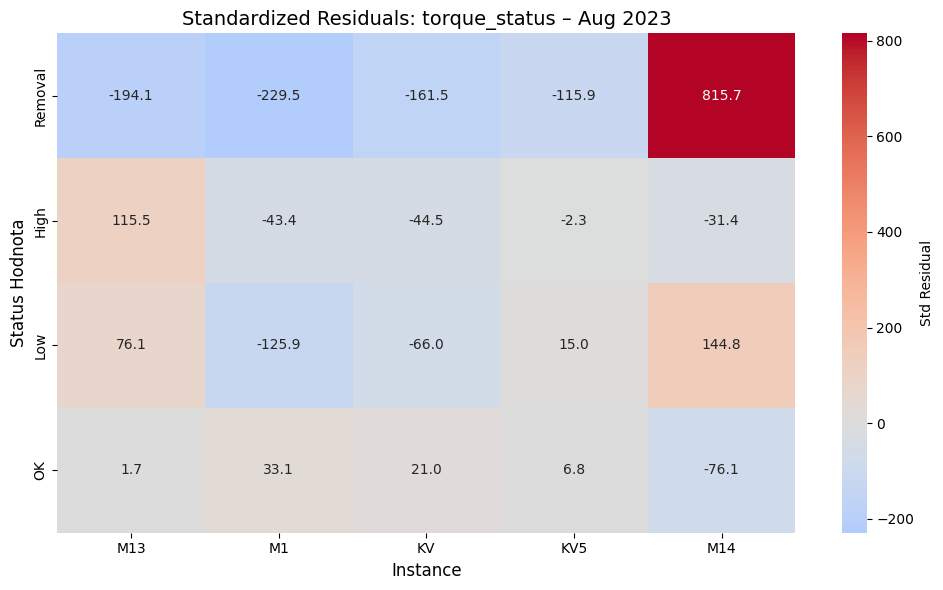

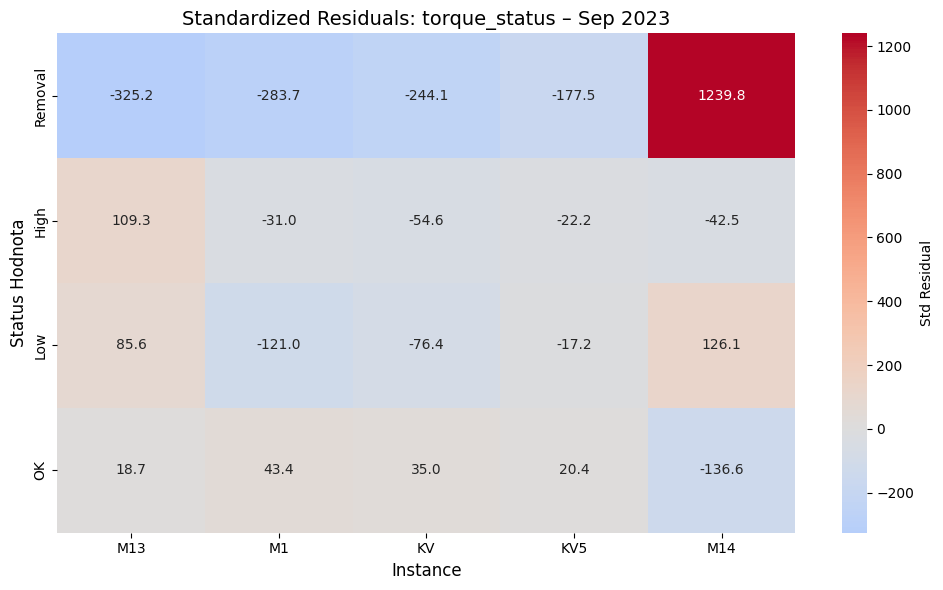

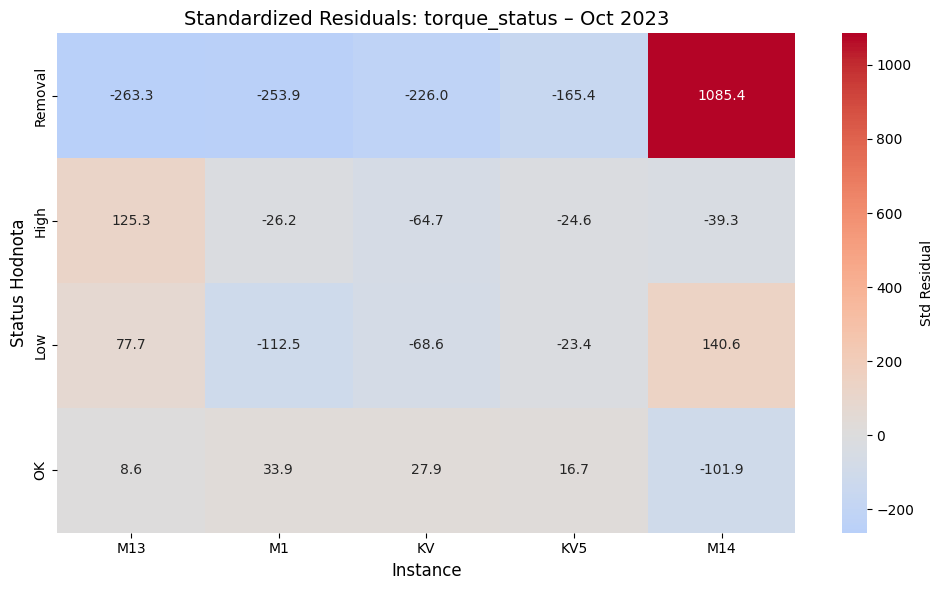

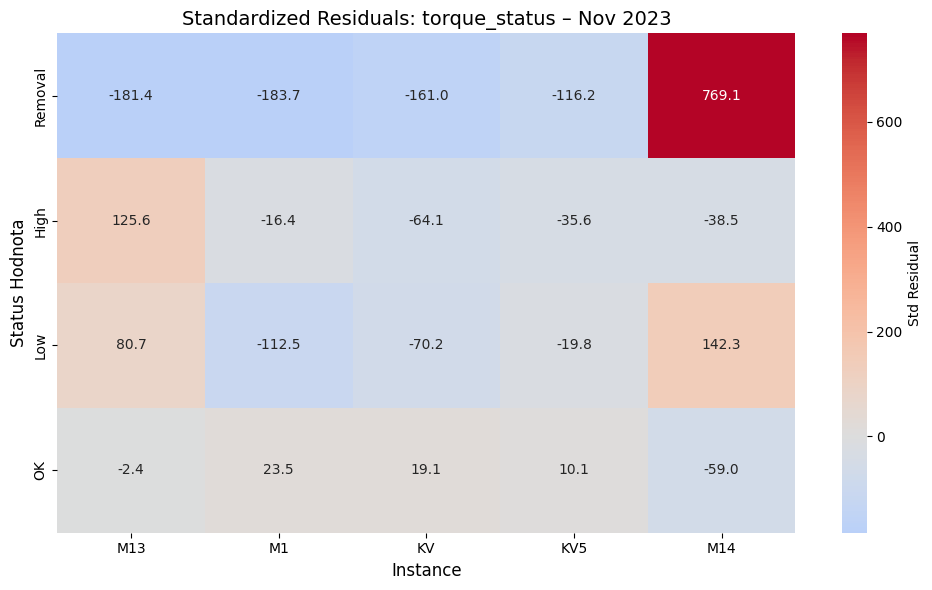

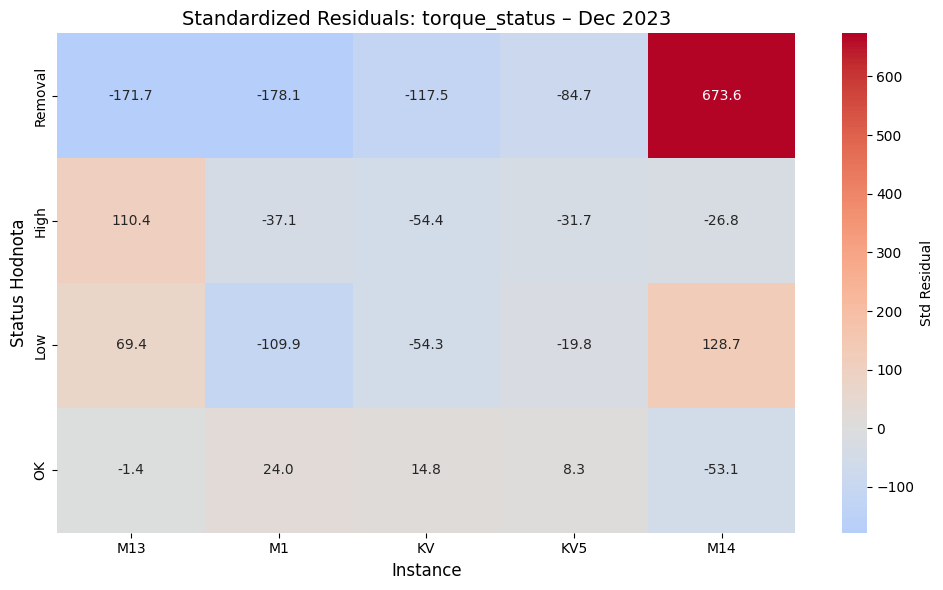

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# make sure time and month are set
df_instance['t'] = pd.to_datetime(df_instance['t'])
df_instance['month'] = df_instance['t'].dt.to_period('M').dt.to_timestamp()

# loop through each status_typ
for status_type in df_instance['status_typ'].unique():
    df_type = df_instance[df_instance['status_typ'] == status_type]

    # prepare: include total + per-month breakdown
    slices =[(month, df_type[df_type['month'] == month]) for month in sorted(df_type['month'].unique())]

    for label, df_sub in slices:
        contingency = df_sub.set_index('status_hodnota')[['M13', 'M1', 'KV', 'KV5', 'M14']]

        if contingency.empty or contingency.values.sum() == 0:
            continue

        # expected frequencies
        n = contingency.values.sum()
        row_totals = contingency.sum(axis=1).values.reshape(-1, 1)
        col_totals = contingency.sum(axis=0).values.reshape(1, -1)
        expected = row_totals @ col_totals / n

        # standardized residuals
        std_residuals = (contingency - expected) / np.sqrt(expected)
        std_residuals = pd.DataFrame(std_residuals, index=contingency.index, columns=contingency.columns)

        # plot
        plt.figure(figsize=(10, 6))
        title = f"{status_type} – {'Total' if label == 'Total' else label.strftime('%b %Y')}"
        sns.heatmap(std_residuals, annot=True, fmt=".1f", cmap="coolwarm", center=0, cbar_kws={'label': 'Std Residual'})
        plt.title(f"Standardized Residuals: {title}", fontsize=14)
        plt.xlabel("Instance", fontsize=12)
        plt.ylabel("Status Hodnota", fontsize=12)
        plt.tight_layout()
        plt.show()


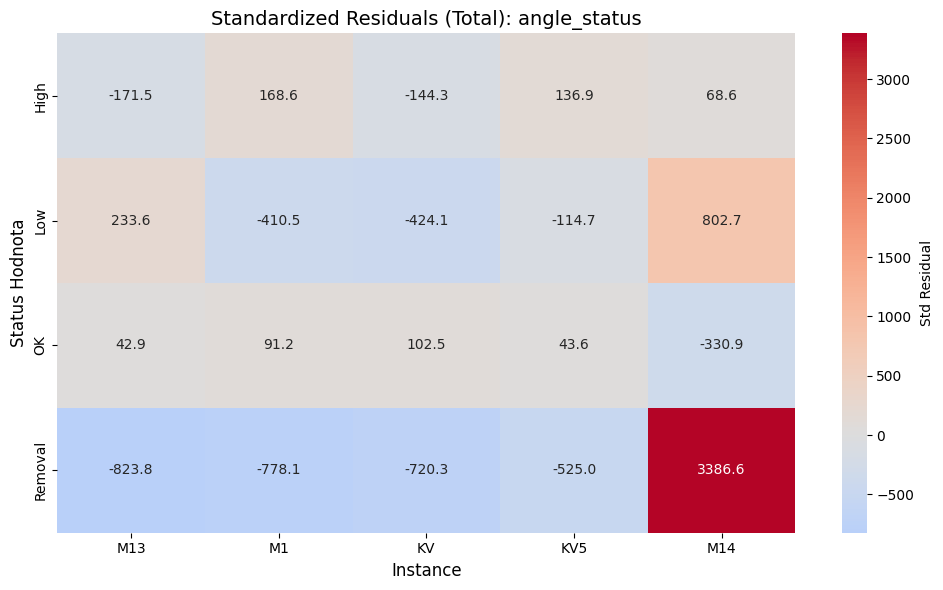

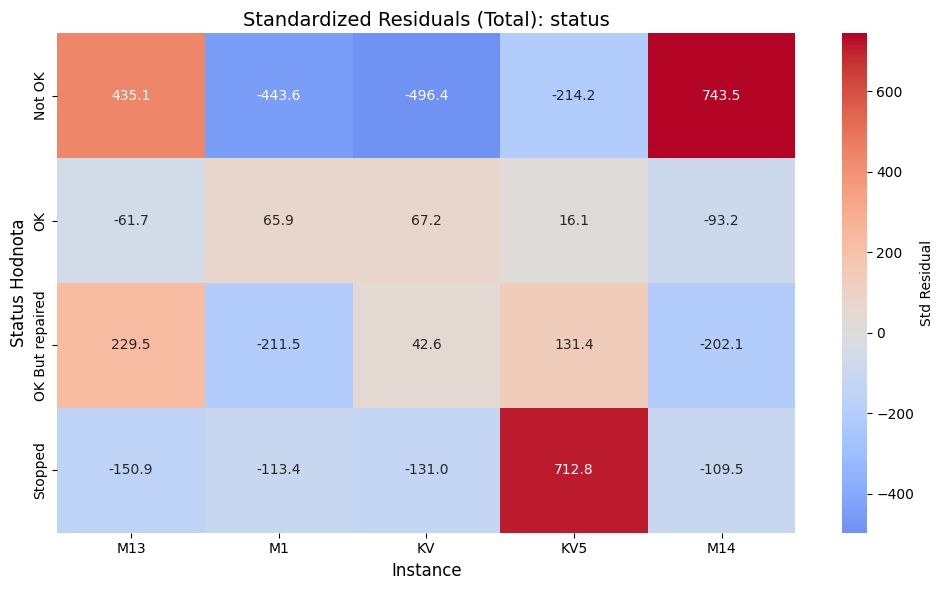

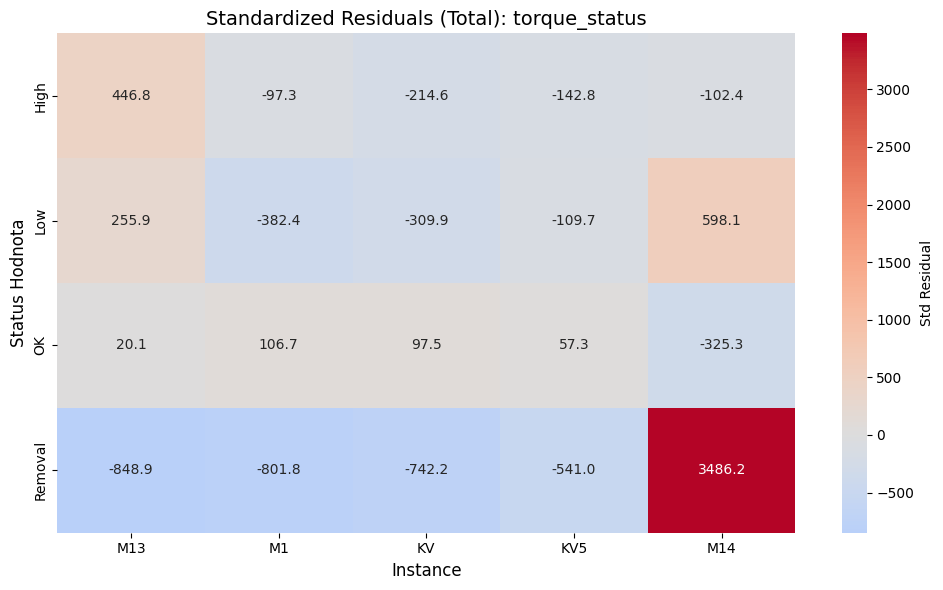

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ensure datetime and month are set
df_instance['t'] = pd.to_datetime(df_instance['t'])

# for each status_typ, calculate the total across all months
for status_type in df_instance['status_typ'].unique():
    df_type = df_instance[df_instance['status_typ'] == status_type]

    # aggregate counts across all months
    total_df = df_type.groupby('status_hodnota')[['M13', 'M1', 'KV', 'KV5', 'M14']].sum()

    # calculate expected frequencies
    n = total_df.values.sum()
    row_totals = total_df.sum(axis=1).values.reshape(-1, 1)
    col_totals = total_df.sum(axis=0).values.reshape(1, -1)
    expected = row_totals @ col_totals / n

    # compute standardized residuals
    std_residuals = (total_df - expected) / np.sqrt(expected)
    std_residuals = pd.DataFrame(std_residuals, index=total_df.index, columns=total_df.columns)

    # plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(std_residuals, annot=True, fmt=".1f", cmap="coolwarm", center=0, cbar_kws={'label': 'Std Residual'})
    plt.title(f"Standardized Residuals (Total): {status_type}", fontsize=14)
    plt.xlabel("Instance", fontsize=12)
    plt.ylabel("Status Hodnota", fontsize=12)
    plt.tight_layout()
    plt.show()


karoserie

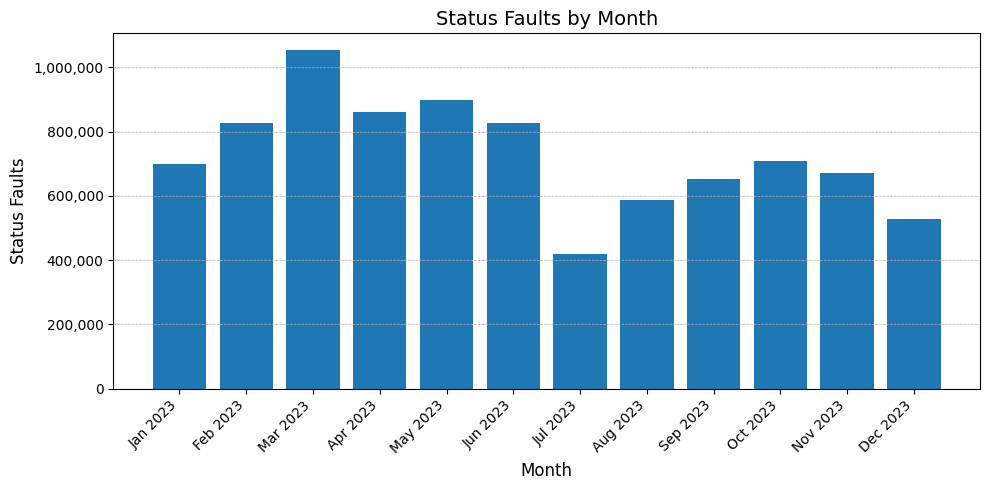

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# ensure datetime
df_karoserie_faults['t'] = pd.to_datetime(df_karoserie_faults['t'])

# group by month
monthly_status_faults = df_karoserie_faults.groupby(df_karoserie_faults['t'].dt.to_period('M'))['status_faults'].sum()
monthly_status_faults.index = monthly_status_faults.index.to_timestamp()

# format month labels
month_labels = monthly_status_faults.index.strftime('%b %Y')

# plot
plt.figure(figsize=(10, 5))
plt.bar(month_labels, monthly_status_faults, color='#1f77b4')

plt.title("Status Faults by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Status Faults", fontsize=12)
plt.xticks(rotation=45, ha='right')

# format y-axis with thousands separator
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [70]:
# list of your DataFrames
dfs = [
    df_carinfo_kombinace_faults,
    df_instance,  # doesn't have total_faults but included for completeness
    df_karoserie_faults,
    df_model,
    df_modell,
    df_motor_faults,
    df_prevodovka_faults,
    df_vybava_faults
]

# remove total_faults if present
for df in dfs:
    if 'total_faults' in df.columns:
        df.drop(columns='total_faults', inplace=True)


In [71]:
df_karoserie_faults.head()

,Karoserie,status_faults,torque_faults,angle_faults,celkem,t
0,1,57886,49108,49764,3082600,2023-02-01
1,1,61287,54635,53367,3398781,2023-03-01
2,1,33124,28504,27404,1953270,2023-04-01
3,1,38162,32346,31998,2292396,2023-05-01
4,1,48064,43208,41551,2904512,2023-06-01


kruskal walis

In [73]:
# calculate fault rate if not already done
df_karoserie_faults['fault_rate'] = df_karoserie_faults['status_faults'] / df_karoserie_faults['celkem']

# compute average fault rate per Karoserie
avg_rates = (
    df_karoserie_faults
    .groupby('Karoserie')['fault_rate']
    .mean()
    .sort_values(ascending=False)
)

print("Average fault rate by Karoserie (descending):")
print(avg_rates.round(4))


Average fault rate by Karoserie (descending):
Karoserie
Unknown    0.1775
C          0.0239
Z          0.0211
5          0.0191
3          0.0182
1          0.0170
4          0.0166
7          0.0148
P          0.0129
Name: fault_rate, dtype: float64


In [75]:
# Step 1: Exclude 'Unknown' and calculate fault rate
df_karoserie_faults['Karoserie'] = df_karoserie_faults['Karoserie'].astype(str)
df_cleaned = df_karoserie_faults[~df_karoserie_faults['Karoserie'].str.contains('Unknown', na=False)].copy()
df_cleaned['fault_rate'] = df_cleaned['status_faults'] / df_cleaned['celkem']

# Step 2: Average fault rate per Karoserie
avg_rates = (
    df_cleaned
    .groupby('Karoserie')['fault_rate']
    .mean()
    .sort_values(ascending=False)
)

print("📊 Average fault rate by Karoserie:")
print(avg_rates.round(4))

# Step 3: Dunn's post-hoc test
!pip install -q scikit-posthocs
import scikit_posthocs as sp

# convert Karoserie to category for proper grouping
df_cleaned['Karoserie'] = df_cleaned['Karoserie'].astype('category')

dunn_result = sp.posthoc_dunn(df_cleaned, val_col='fault_rate', group_col='Karoserie', p_adjust='bonferroni')

print("\n📈 Dunn's Test (Bonferroni-adjusted p-values):")
print(dunn_result.round(4))


📊 Average fault rate by Karoserie:
Karoserie
C    0.0239
Z    0.0211
5    0.0191
3    0.0182
1    0.0170
4    0.0166
7    0.0148
P    0.0129
Name: fault_rate, dtype: float64

📈 Dunn's Test (Bonferroni-adjusted p-values):
        1       3       4       5       7       C       P       Z
1  1.0000  1.0000  1.0000  0.7488  1.0000  0.0009  0.1584  0.0243
3  1.0000  1.0000  1.0000  1.0000  0.0486  0.1166  0.0007  1.0000
4  1.0000  1.0000  1.0000  0.1684  1.0000  0.0001  0.5296  0.0028
5  0.7488  1.0000  0.1684  1.0000  0.0017  1.0000  0.0000  1.0000
7  1.0000  0.0486  1.0000  0.0017  1.0000  0.0000  1.0000  0.0000
C  0.0009  0.1166  0.0001  1.0000  0.0000  1.0000  0.0000  1.0000
P  0.1584  0.0007  0.5296  0.0000  1.0000  0.0000  1.0000  0.0000
Z  0.0243  1.0000  0.0028  1.0000  0.0000  1.0000  0.0000  1.0000


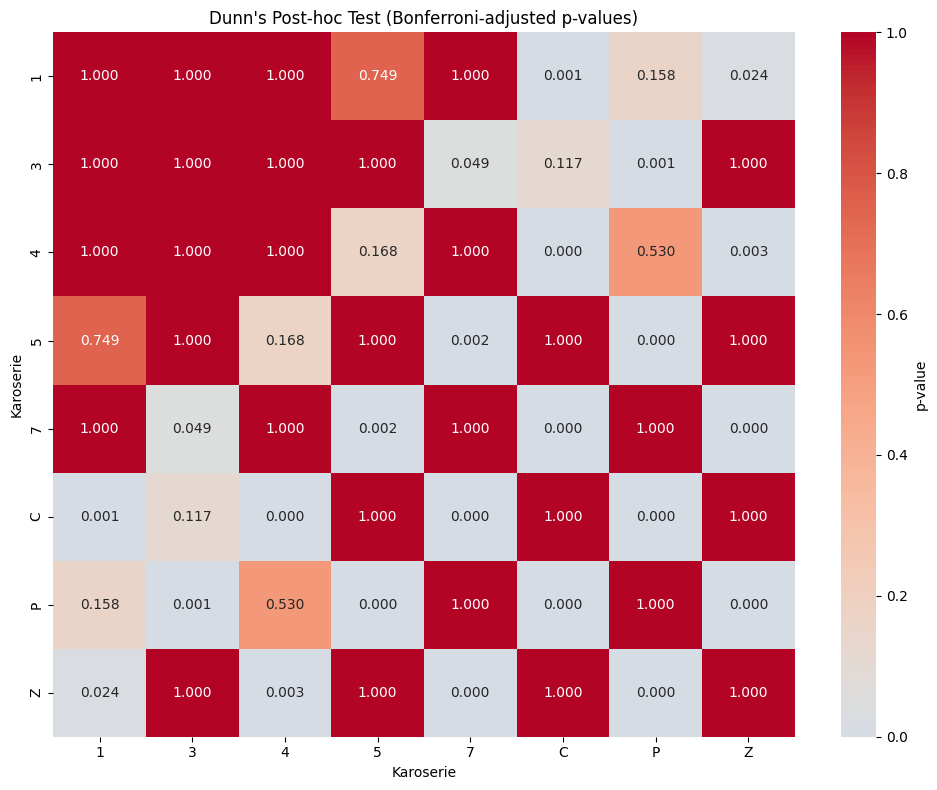

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(dunn_result, annot=True, fmt=".3f", cmap="coolwarm", center=0.05, cbar_kws={'label': 'p-value'})
plt.title("Dunn's Post-hoc Test (Bonferroni-adjusted p-values)")
plt.xlabel("Karoserie")
plt.ylabel("Karoserie")
plt.tight_layout()
plt.show()


p is signif lower but otherwise nothing fun here

Model kruskal-wallis p-value = 0.000000


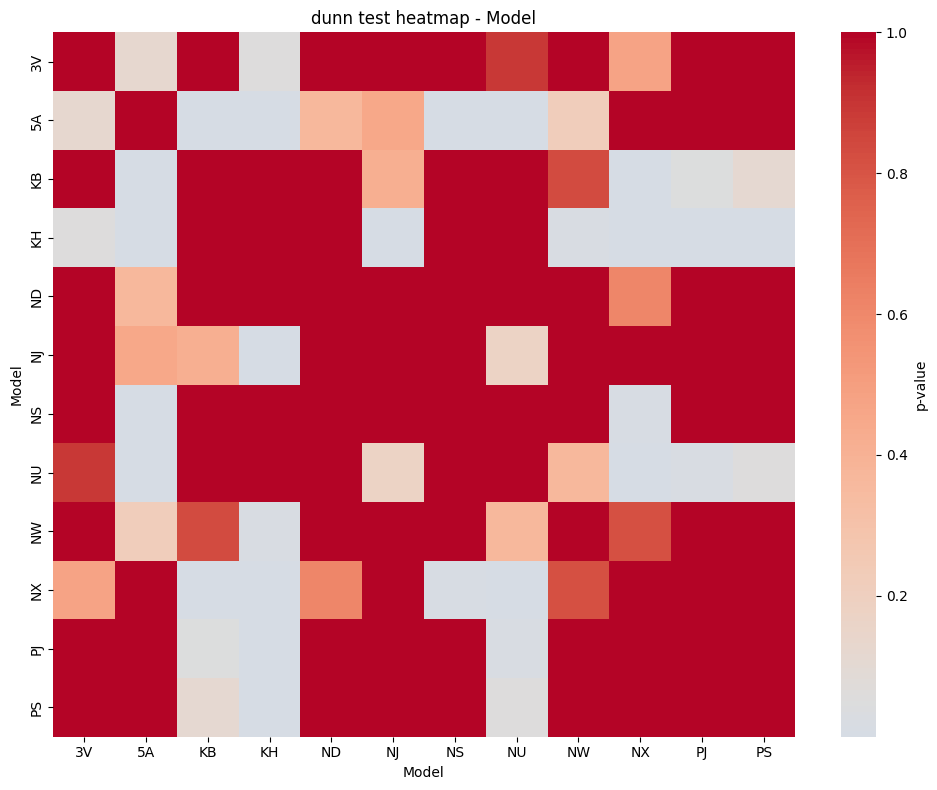

Model
PS    0.0327
5A    0.0214
NX    0.0200
PJ    0.0178
NJ    0.0171
3V    0.0169
NW    0.0169
NS    0.0154
KB    0.0142
NU    0.0139
KH    0.0129
ND    0.0125
Name: fault_rate, dtype: float64
Modell kruskal-wallis p-value = 0.000000


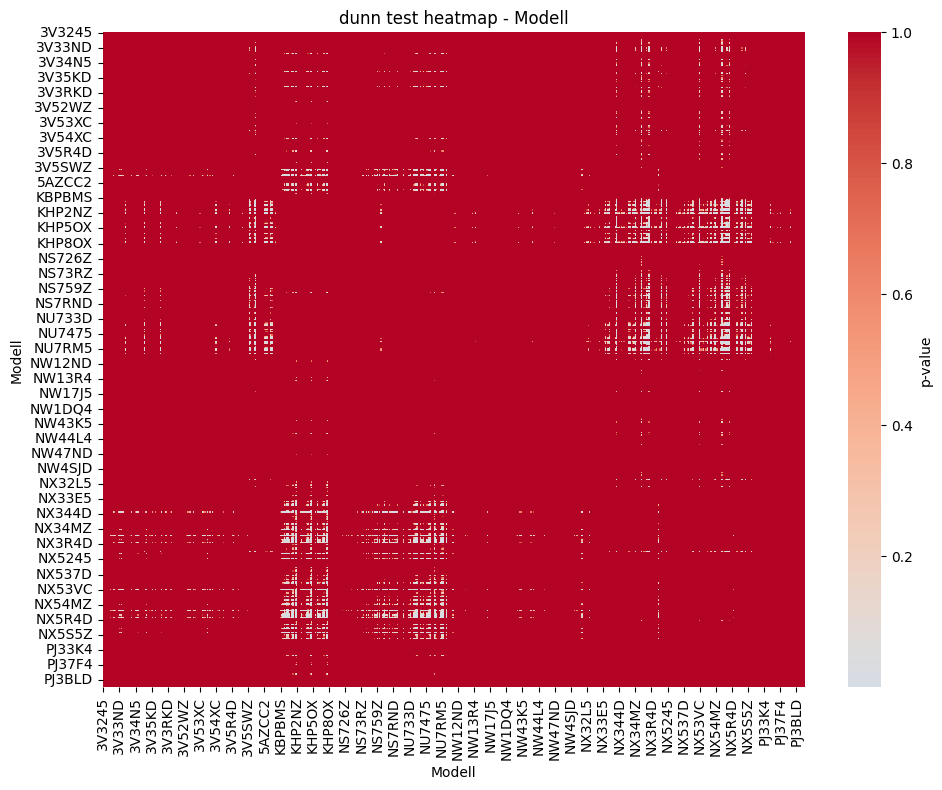

Modell
NU7RND    0.1406
NX54KC    0.0452
PJ3BL5    0.0436
NU72ND    0.0381
NW47ND    0.0349
           ...  
NX53KC    0.0091
NU72M5    0.0090
NW1BM5    0.0058
3V53KD    0.0056
NX54T5    0.0032
Name: fault_rate, Length: 566, dtype: float64
Motor kruskal-wallis p-value = 0.000000


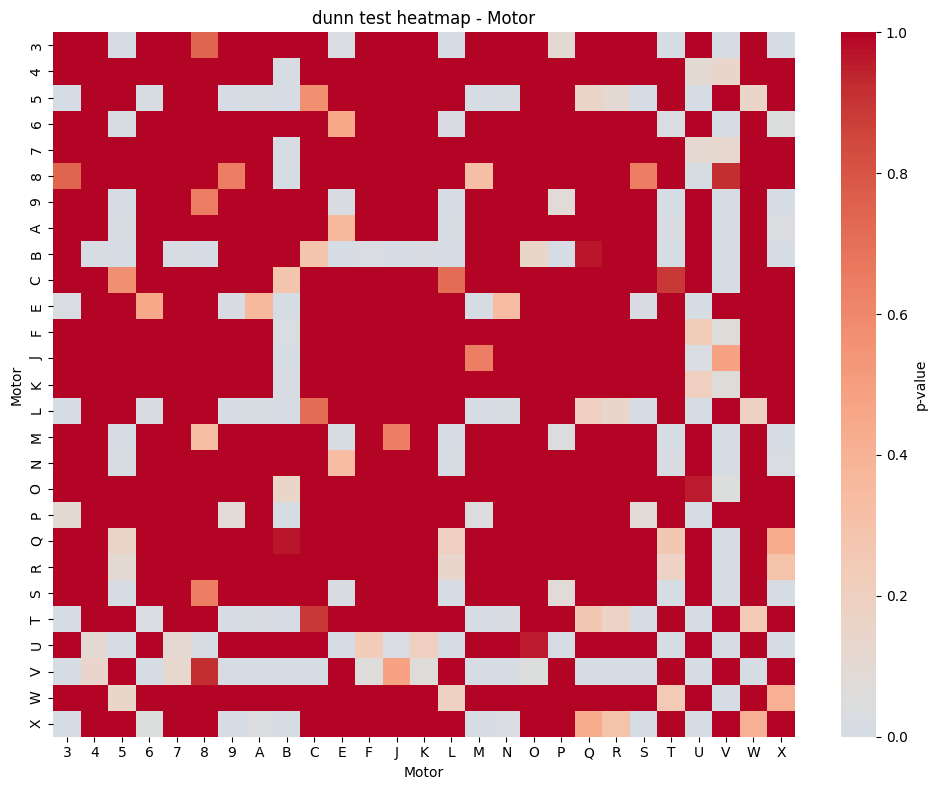

Motor
V    0.0291
X    0.0209
5    0.0202
T    0.0202
L    0.0201
E    0.0194
P    0.0189
8    0.0184
J    0.0181
4    0.0178
K    0.0178
7    0.0177
F    0.0176
C    0.0172
W    0.0171
Q    0.0169
R    0.0168
O    0.0167
A    0.0163
N    0.0163
6    0.0163
9    0.0156
3    0.0155
M    0.0155
S    0.0151
U    0.0143
B    0.0132
Name: fault_rate, dtype: float64
Prevodovka kruskal-wallis p-value = 0.000000


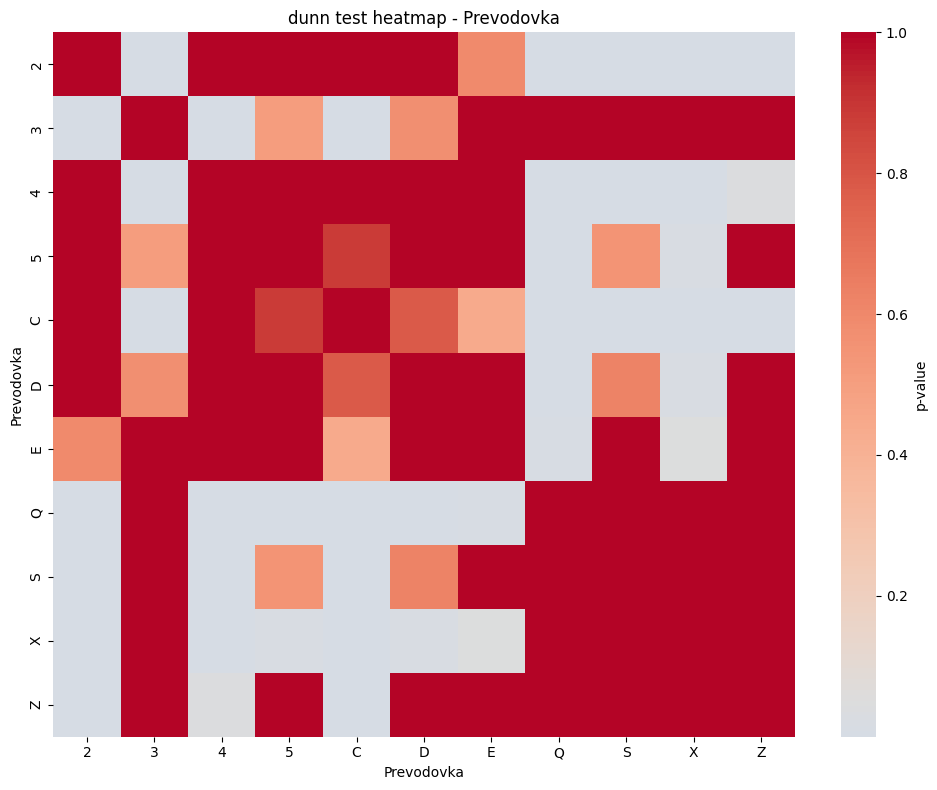

Prevodovka
C    0.0216
2    0.0208
4    0.0192
D    0.0173
5    0.0173
E    0.0171
Z    0.0153
3    0.0143
S    0.0143
X    0.0132
Q    0.0127
Name: fault_rate, dtype: float64
Vybava kruskal-wallis p-value = 0.000000


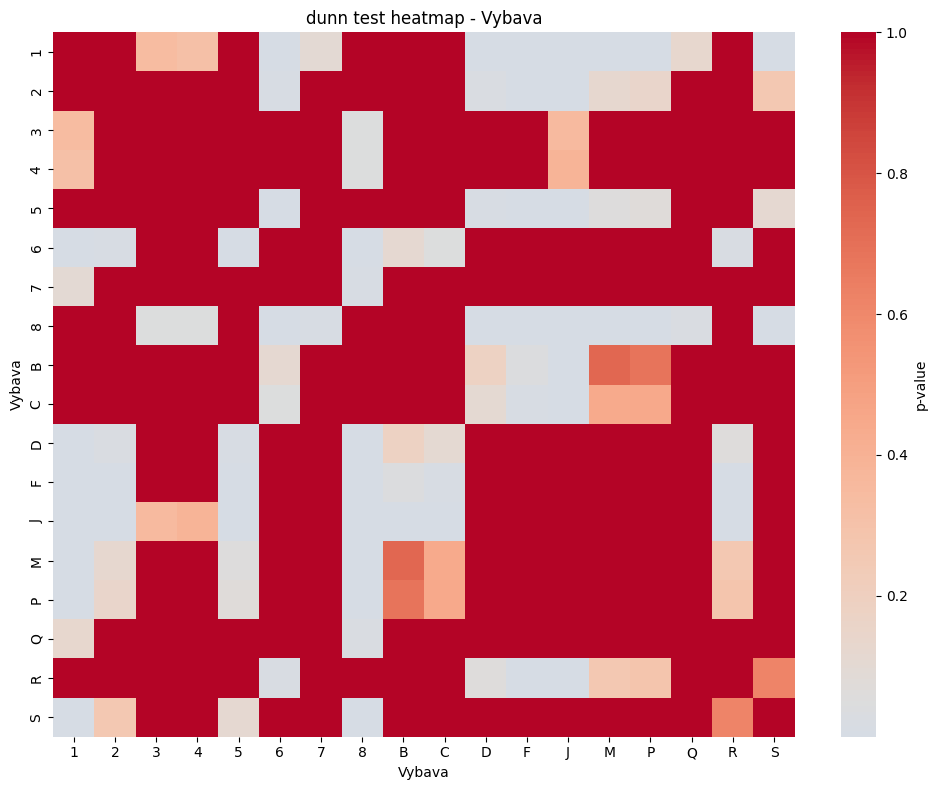

Vybava
D    0.0296
P    0.0251
M    0.0242
J    0.0216
F    0.0206
6    0.0199
S    0.0186
Q    0.0180
7    0.0177
4    0.0174
3    0.0174
C    0.0156
B    0.0154
R    0.0154
2    0.0151
5    0.0147
1    0.0132
8    0.0124
Name: fault_rate, dtype: float64


In [81]:
!pip install -q scikit-posthocs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp
from scipy.stats import kruskal

group_dfs = {
    'Model': df_model,
    'Modell': df_modell,
    'Motor': df_motor_faults,
    'Prevodovka': df_prevodovka_faults,
    'Vybava': df_vybava_faults
}

for label, df in group_dfs.items():
    df_clean = df[~df[label].astype(str).str.contains('Unknown', na=False)].copy()
    df_clean['fault_rate'] = df_clean['status_faults']/ df_clean['celkem']

    groups = [g['fault_rate'].values for _, g in df_clean.groupby(label)]
    stat, p = kruskal(*groups)
    print(f"{label} kruskal-wallis p-value = {p:.6f}")

    if p < 0.05:
        dunn_result = sp.posthoc_dunn(df_clean, val_col='fault_rate', group_col=label, p_adjust='bonferroni')

        plt.figure(figsize=(10, 8))
        sns.heatmap(dunn_result, annot=False, cmap="coolwarm", center=0.05, cbar_kws={'label': 'p-value'})
        plt.title(f"dunn test heatmap - {label}")
        plt.xlabel(label)
        plt.ylabel(label)
        plt.tight_layout()
        plt.show()

        avg_rates = df_clean.groupby(label)['fault_rate'].mean().sort_values(ascending=False)
        print(avg_rates.round(4))
